In [30]:
# 모델 저장과 복원

# 방법1) 모델전체 저장(모델 구조+가중치+변수)
# save_model()
# 복원시 추가 작업 필요 없이 모델 파일 로딩해서 사용 가능

# 방법2) 가중치만 저장
# save_weights()
# 복원시 모델구조(Architecture) 생성 후 가중치 적용

# 방법3) 모델 전체 또는 가중치 자동 저장
# fit()에서 ModelCheckPoint Event에 대한 callback 등록
# save_best_only=True : 모니터링 기준에 따라서 좋은 성능의 모델만 저장
# save_weight_only=True : 가중치만 저장

# 파일 또는 폴더
# 파일 확장자가 없으면 폴더로 저장
# 파일 확장자
# h5 / hdf5 : HDF5 포맷으로 모델 또는 가중치 저장
# ckpf : 체크파일형태로 저장
# pd : 모델 저장

In [31]:
# [1] 데이터 준비

In [32]:
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
import numpy as np

In [33]:
iris=load_iris()

In [34]:
x_train=iris.data
y_train=iris.target

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')

x_train.shape : (150, 4), y_train.shape : (150,)


In [35]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [36]:
# [2] 데이터 전처리

In [37]:
# Feature => 꽃잎의 길이, 너비
x_train=x_train[:, 2:]
x_train.shape

(150, 2)

In [38]:
# Target => 문자 => 수치화
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
lencoder=LabelEncoder()
y_train=lencoder.fit(y_train).transform(y_train)

In [40]:
ohencoder=OneHotEncoder()
y_train=ohencoder.fit(y_train.reshape(-1,1)).transform(y_train.reshape(-1,1))

In [41]:
y_train=y_train.toarray()

In [42]:
x_train.shape, y_train.shape, y_train[0]

((150, 2), (150, 3), array([1., 0., 0.]))

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
x_scaled_train=scaler.fit(x_train).transform(x_train)

In [46]:
from  sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_train,
                                              y_train,
                                              stratify=y_train)

In [48]:
x_train,x_val,y_train,y_val=train_test_split(x_train,
                                              y_train)

In [49]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')
print(f'x_val.shape : {x_val.shape}')

x_train.shape : (84, 2)
x_test.shape : (38, 2)
x_val.shape : (28, 2)


In [50]:
x_train[0]

array([-1.2833891 , -1.44707648])

In [51]:
# [3] 모델 구성 및 생성
# 입력 데이터 : 2개 Feature
# 출력 데이터 : 3개 품종
# 학습 방법 : 분류 - 다중분류

In [52]:
# W,b 초기값 고정
set_random_seed(15)

In [53]:
irisModel=Sequential(name='irisModel')

In [54]:
irisModel.add(Dense(9, activation='relu', input_shape=(2,)))
irisModel.add(Dense(3, activation='softmax'))

In [55]:
irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


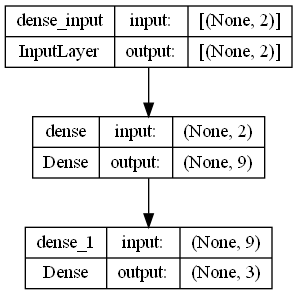

In [56]:
plot_model(irisModel, show_shapes=True)

In [57]:
## 모델 생성
irisModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [58]:
# [4] 모델 학습
irisModel.fit(x_train, y_train, epochs=1000, verbose=0)

In [59]:
# [5] 평가
lossv, accv=irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.8947


In [60]:
lossv, accv

(0.17298276722431183, 0.8947368264198303)

In [61]:
# [6] 모델 저장

In [62]:
from tensorflow.keras.models import save_model

In [63]:
M_FILE='irisModel.h5'
W_FILE='irisWeight.h5'

In [64]:
if accv>=0.97:
    save_model(irisModel, M_FILE)
    irisModel.save_weights(W_FILE)

In [65]:
# [7] 복원
# 모델 또는 가중치 복원
# load_model(모델 파일 또는 모델 폴더명)
# Sequential.load_weights(가중치 파일 또는 폴더명)

In [66]:
# [7-1] 모델 복원

In [67]:
from tensorflow.keras.models import load_model

In [68]:
reModel=load_model(M_FILE)

In [69]:
reModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.8947


[0.13688954710960388, 0.8947368264198303]

In [70]:
reModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 9)                 27        
                                                                 
 dense_25 (Dense)            (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [71]:
# [7-2] 가중치 복원
# 모델 구조 생성
# 가중치 로딩

In [73]:
# 모델 구조 구성
newModel=Sequential(name='newirisModel')
newModel.add(Dense(9, activation='relu', input_shape=(2,)))
newModel.add(Dense(3, activation='softmax'))
newModel.summary()

Model: "newirisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 27        
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [74]:
# 모델 생성
newModel.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [76]:
# 가중치 로딩
newModel.load_weights(W_FILE)

In [77]:
newModel.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.8947


[0.13688954710960388, 0.8947368264198303]

In [78]:
# VGG-Cifar10 다른 사람 과제 배워보기

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets.cifar10 import load_data

In [80]:
# [1] 모델, 데이터 불러오기

In [83]:
tf.random.set_seed(72)

In [85]:
input_shape = (32,32,3)

vgg16=VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

In [86]:
(x_train, y_train), (x_test, y_test)=load_data()

In [87]:
# 스케일링
x_train=x_train/255.0
x_test=x_test/255.0

In [89]:
x_train.shape

(50000, 32, 32, 3)

In [90]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [91]:
# flatten 대신 globalaveragepooling 사용
vgg16.trainable=True

model=Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [93]:
# [2] 모델 학습

In [95]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [96]:
stop_cb=EarlyStopping(patience=5)

In [97]:
M_FILE='inModel.h5'
W_FILE='inWeight.h5'

In [98]:
model_ckpt_cb=ModelCheckpoint(filepath=M_FILE, save_best_only=True)

In [ ]:
his=model.fit(x_train, y_train,
             epochs=30,
             validation_step=2,
             validation_split=0.2,
             callbacks=[model_ckpt_cb],
             batch_size=32)

In [ ]:
# [3] 모델 평가

In [ ]:
model.evaluate(x_test, y_test)

NameError: name 'his' is not defined

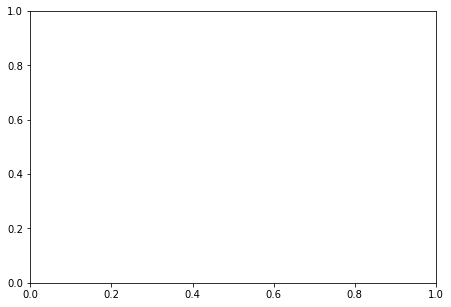

In [101]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
plt.plot(his.epoch, his.history["accuracy"], color="royalblue", label="accuracy")
plt.plot(his.epoch, his.history["val_accuracy"], color="red", label="val accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(his.epoch, his.history["loss"], color="royalblue", label="loss")
plt.plot(his.epoch, his.history["val_loss"], color="red", label="val loss")
plt.legend()

plt.show()

In [116]:
from keras.models import load_model
from keras.datasets.cifar10 import load_data

from io import BytesIO
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [102]:
# [1] 모델, 데이터 로딩

In [103]:
M_FILE='inModel.h5'
W_FILE='inWeight.h5'

In [104]:
model=load_model(M_FILE)

OSError: No file or directory found at inModel.h5

In [105]:
(_, _), (x_test, y_test)=load_data()

In [106]:
# 스케일링
x_test=x_test/255.0

In [107]:
# test 데이터로 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 36s 115ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025922775268555, 0.10000000149011612]

In [109]:
# [3] 새로운 데이터로 예측

In [118]:
# 새로운 사진 예측 함수
def pred_print(model, url):
    pre_val=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
    # 이미지 불러오기
    req=urllib.request.Request(url, headers={'User_Agent':'Mozilla/5.0'})
    res=urllib.request.urlopen(req).read()
    urlopen_ima=image.open(BytesIO(res)).resize((32,32))
    test_image_arr=np.array(urlopen_img)/255.0
    
    # 이미지 그래프로 그리기
    plt.imshow(urlopen_img)
    plt.show()
    
    # 예측
    result=np.round(model.predict(test_image_arr.reshape(-1,32,32,3)),3)
    print(f'예측값 : {result}')
    print(f'예측값 종류 : {pre_val[result.argmax()]}')

In [119]:
test1 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVEhgVEhUYGBgRGBESEhgSGBgVGBIRGBgZGRgYGBgcIS4lHB4rHxkYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHhISHzQrJCs0NDQ1NDQ0NDQ0NDQxNDQ0NDQ0NDE0NDE0MTQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQxNDQ0P//AABEIAK4BIgMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAADAAECBAUGB//EADsQAAIBAgQEAwUHAwQCAwAAAAECAAMRBBIhMQVBUWETInEGMoGR0RRCUnKhscHh8PEVI0NiB5IWJIL/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIEAwX/xAApEQACAgIBBAIBBAMBAAAAAAAAAQIRAxIhBBMxQSJRYRRCcZEygbEF/9oADAMBAAIRAxEAPwAjCDbSXGSBajPZs8sp1LwN+kuukCUlJisrxF7Q+SRNOUKwIe+8fLeGWlJFIWFkKadYdQILWSDRMLCNBAx7yDQSCx2aQvGjgQaGmOKd4/hwqKZJlisoAaclkk4VDCwKpSEpm0sFQY3hRNgTRzC3gQsmJFATtIlIxeN4kKCyWWSVYMVYjUlUBMkiSFQQPixidZSQmXFjNBo+kQa+8aRLZWq05WZBL9SBZJ0TEZzprIlJfamekFUSWmNMz2g3WHemYJ5Q7AZIoTKIoFWdQjQtryukKhmJkog1KBdJbYXgnpmNAyrk7SJWWVWM1O+0qxUCUdI5pwxQLIeNaAgJpRss0+F4B8Q9l8qL77dOw6manEeEYajTLtnNthmtmPynOWaKer8nWOGTWyOWZekGyQpcQTm87JHIGIZYAGEEckNFpDCsl5SDWhkqzm4sqyTJI2Ik80eAEVaPzjMJAtCgLAMjeCFSOHhQEzINFmkbxpCEBJqJC8msoBWkqFIuwVQSTsBreEw2Geo4RBcn9BzJ6Cdjw3hyYdL6FyPO5/YdBOGXMoL8nXHic3+Dm/8ATKqqSyWA3LEC36yqCLXH6c5c41xHx3NND5EPnP42/D9flKaiPDKUltIWWMYuojEXkWMPlAgagmhHECW11kXMcrEFlCKz05TrUpp1FtKzrLQ7M7JFLWSKWGxro0LnvKimOtS0x6gmaKLJZBKKYgnnJ+P1MnVj2RbKCBdwNpWfFd5WqYgylFg5INVqdJY4Rwl8Q+5CL779P+q9TFwThL4h+aopGduv/Ve/7TvKFFKaBKYCqosAP39Zwz59PjHydsGFy+UvBGlSSlTCIMqoP8knmZwvtDxLxamUHyJoO7Tc9p+KZEyIfM2n9+n0nFkTn0uLaW8jr1ORRWqGzQiGRyxwJ6NHnk4jG1kgImUmQvJCSCx7RFEle28MjiVSZJDIaGmWGYQLRzIiCCyLGJTC2kTTggsUYGFSneS8OPgLBXlzAYJ6rZaY9WPur6n+JLh/DHrPlTQD3mOyj+T2neIgRAo2UAaADbsNJnz51DheTviw7cvwVcBgUoJlXUm2Zjux/gdpz/tDxcsfBpHU++w+6u3+JZ9ouMZBkp6u/lAHX6dTOew1LKNTdm1durfTpM2HG8ktpeDvlmscdY+SdOmFFhsP7+cLlitCgCeivBgbsHlkGWWAkG6SkSAZIgsKIQJHYFR0ld0EvukrvTjTAp+FFLWQxSrAq5THUQ4TrGM5ACN5BlMPmkbxoVgwhnScF4BSq0w7Z23DC4UAjextcjvJcH9ni9nrghdwmxb83Qdp09SqlNOSqo0A0AA6CYc/Ufti+TbgwfukuCeHooiBEQKqiwAJlfGcSoID4jBbdGO/QdT2nO8X9ozbLSBsbjNyP1/achxOm1bzMxLKSQTse3aY9W+WarSXB0PtFw5kqZ7lkYDK2+UdCe+95lBLTY9lePrWT7LihZ0GRHbZgLCzdDqN99I/F+DtSOZRdN+uUdR1E24M2qUZcGPPhb+SMjLI+HCxgZusx2R8ORIhWMiiXisaGCx8ghctorSLLANTkQsskSGSFgQWSyxssUY7HCx8kQJk0MBCRJr8G4UKxJcsFWwNhv2zHaE4Xwd3ILgom9yLFvQfzOpRFRQqgADQATHmz0tY+TVhwtu5eAdCglNAlMWA/fqTzMyuO8XWih18x26j+ss8V4itJCxIvy+s4daxrs1RjmsSAN8nc9zMsIucvJqnJQjYHhFcVcSfGfLnFka2bKb3y77GdR/of4KyH8wK/WchxOy5cq6sTc9LdO89G4ZjqLU0ZQLFVI+XPvOspTxPVM5KMcq2aObxeBqUz5103zKbqR+YSuj9IT/ynxW2CCUSVZ3QOw+6mt7dLm3znMextdmpMGNwrC3xGv7TRgzuT1kjhmwqK2TOqR+sTiBVrSZaa6MtklWEy9IIR85ETQhVBBWjtUJjBZVANYRQnhxQAos0gyRpc4fgHrNlQaD3mPuqO/0kNqKtgrk6RTw+Hd2CqCxJsAJ2HB+ArSs9SzONRzVPTqe/ylijhqWEp3O50LEeZz0A6dpl8Q4hUddPKvIA6n1MxzyzyvWPg2QxwxLaXk0eJ8dSndV8z9th6zlsXi3qteod9gNv6wTJHVbGdcXTxjy+WccvUSnwuEDqU7i15nVDYnVtGA230Gg0m2SJQxtIsPKbEWJtbUAjrzhkx3yh4c2vxfgr07MQVcK18t2Byva/lcc11PpOn4Lx3U0MZZTmVaZLMSuYeUOxABvY2YEg6X11PGeOAffOjj7vIgDTTe+4m7hKyYimEeoi1ULpTcgeXcpmB0ZPXY2traZGvs3J/Rrca4GUJemLg3JUc+69D2nPm83OB8WqJVOFr+dUVmJIP+2LrZQ+zhQb36dxabWM4HTqjMpsTqHSzA/mA39RO2PO4fGXKM+XApcx8nFLCK1pp43gNZNcmdfxJ5h8hqPjMw0yNLH4gzVHJCS4ZlcJR4aFmjq0cUW5Kx9ATCJhHOyP8Eb6Rtr7CmREmBCLw2udqT/+pEMvB8Qf+J/0H8yHKP2ilCT9FRlFoMLNReA4k/8AGfiV+s0cN7LudajW7J9T9JLzQXsqOKb8I59Kd5t8F4QWYO2iqQV5FiOnbvNilwWmg9zN3Y5v7+UuhP0mXJ1NqomjH01O5Ds0q4zEZELWvYX/AL7SwymVsThC4sdjMprODx+fEktmypfyXHv9+w6QXBnqYasqqR/vMiEXGtzYNbsTOx/+P9GsOlrynifY1XqCp4jqwCgZQN1NwdZ3bx68eTglk258G6MGXFqgpuDuGS9/jOK9tsTS4dkFNSDXJKIGuqgWzML6gaidzSwzAb3PU/0mTx/2RoYwq1cPmQMEKOVsptca3HITimztSOKZxi6Klj5X3G5BG4lnBYZKSZKYsN+5PUzqMJ7JUaVMJTz2FyMzXOvwlbFez7LqrfObsObDGvTMWbFll/BlI0nmEHURkNmFpHNN0XGSuLMUlKLqSCNUjXjAxi0qhWTVoVXgM8QeLULLOcRStcxQ1CyP2WWcOrgWR3UdFdl/QGaAw+kdaQEzuV8HVRplVKZzAuzNbS7sWIHxlnFJZQPlIsR6SFd8wt0irkfhFCoIEiHdOsGbCdUcWQKnmZAW/wAybtBkf5lpEsz+KYc5S9M2IKswte5H3h0IHzlDB8RKOGWomj5gSmmVgQXt+E63E3Mt5zONoeFUKsgZLsyNawKsLZWb/rMufHXyRs6bNfxf+jvOCcUz5ULLnJdaZRmXMqEWBU6MpU+VteQ9eo4bRZVuFfM9i4Yk2a1jbkJwOANMVqQym5NGopVyMzrUV2rEHlkBFu2gO89Kr8TpZWC1FupRWswupexXTqQdJ505pK1zwb4h6YfmLd7wGDx6VgWpMHVWKFlW4zC17NzGu4mJxTHkUiBXKK16bvYHwqf4uxJ0udrzS4FRWhhKS0kPuU8yqT7zICza95yxz3V0Pyaov/YiObv+0r4LFM981NqdrWzak62tty/mPWp1T7rqPUGWUVeN8QGGoPXe5Wnl0B1YswUAd7mGwGIWrTWot8rgMt7g5TtpMrjPAq2Kp+FVrKELK5Cob3U3Gtxzm2iCnTVEGiKqr6AWEAHIMgQYg7fePwGw9epkWaKhiJgnrqN2A9SJkcZ46lJd9eVtSfT6zgeIcVeq1ySANgOUajZLdHr1FLi45wwpdZgezOKL0Ec8xY+o0P7GaOOx6oM7uERLFibBRrY5jy0vE3qOy/4Ygalemtgzqt72zMova97XPY/IyvieMUUps7VkAUDUsMoLe7e3W4nNPwxMtnxKHIAl7bu7F7mx0uzX0PIcrwWvt0JyOqOPoBQ3jU7MQFOdbMTawBvr7y/MS2KU5ClhEUrfEp5KqgWDZhVcrmUNn1uFUC973a97zqvH81r/AA6DlDh+GCdhvAEBiaQA3+cIuIvb4Tx7iPDcdiroUqs/i3BcsFyHMGOZtAAVX5wS+wbo3Pafj+DGZAxeqmZSKNj4bjQh22uDy3nPex+GxFQOtR86ItM0nI1a5N1Y7ggW0PXczr+Df+PaKZamLK1KoFiAWyWAFs+xdh+IgX0uNJ1IwiKuVQoUaAKAAPgJ1jklF3Fkygpqmjz+ohQ2YW/n0gWadxjeFq4sQJyXFOHNROuqk2B79DPQwdUpPWXk8/P0rito+CiWiDxERiJutGLkn4hikIocC5OhbEWgWxHeVi8bLMqijS5MI9S/OAdyNo5SDKS1FHNyYNnJ3kCYZkkcspUQwJElrC5YssdioEEjlBb1hVSSCRWFFJ8IDlsSpQhlymwB05dNBpK2Pwjtd1sz7kaAVG0GY3G9ha17ek1wkcJOE8EG7Sp/g7wzTj7MzCcR+zg+JmKVbZjlIanUIOZ3F7XNwLjoPWaHs5xhkwlVlJ/2XVl3ZkC5S6sDe2ezbXFzJPTBFmAI6EXlZcIqklBlzb22PreY59G0m4u237NEerXtHQ4LjJr1Eek4dXqXU2sRhrG6G9rMp5c7azVwXEX8RUqOCVV0qWXKr1tHUo1vwakd+xnAfZXTWgwTUkgAAXP3h0b9JoYJMVWcJds11u9MgKAuzuNrjbYzhLFOCbkuL4/g0wzRlwmdnxPiD5CtFH8RtKdxmTNv5iDoJdpBgLuxJYKSNMqEAAhdL2vc6x0XKLfPuZWxmMRFJYjr0/xI/g0UHq1AouTacrxv2gtdKep59B6nn6SlxXitSsCKZsu1ybXH/Uch3lPgRWnUYV6autQAeYZrMDLUHVtEOa8JmLiUZ3D1HZmVmJ5ZkItlI7de0qU8IFZDmY+GHWxPvhjpfuLbz0g4DCvvQIv+BmX9DM7ivBqCU2qqzBKYLVM491RzzCc+9jurCjO4ItN1qI5ZfEptRKq1gabG+YdGBLfObGM4dRqrUV2f/wCwlGnUIIv/ALXuONPe+k5fheOpVfNRvpr00POa4rt0ndYpS5RDyRjxJlLDcDQB6D5iHGZnCtp4dlRrjQkrl26EEaToaHCcOEy+bzJSVsza3QDKfzaCZoxTdo/21on0jk3a8/8ASe7BezQ4hQw6I7+GXzPTqMA5BDofK46agXl/BccWogceWx1Vt1YX3PO4nPnGNKtNsrFlJF9CNLEfKdY9K0uELvwXs7EcV5aaSriePurWSlm097Mqr6am85xsUf7Mi1c9I108voT6mH2bicdrFvOEVeisWbfmbdOkJU9oANgT85zZqGMWPWWulfsiXVxXg16/H6h91QPzTMxOKepbxGvY3A2APWBineGCMHfkzT6mU1XgUVo4immzONaKStFCxUaLJ1FpK42m7jaiNsFHS4mU667TPCey5RolDX2VrCQaWlpk7CM1MidE0c2mUWBjFTLhpyOQyrJ1KmQxwksFIskLCgSrJqI9orQAYiMZLLHywECKxisNll/hnDGqG50Qbnmey/WROagrZcIObpAMBwl6pHlKrzZhYW7A7zqsLhUpLlQaczzY9SecIzhVtfQDcznuK8bJJSlqdmPJfzH+N55s8s8rpf0enjxQwxt/2XeLcYSkp1F/57dZzWJ8Soc9QMAfMqkNax2LX94yriMEXOZnJPfb4DlOt9ncTVqIVzAilZGJ11toLW3tb5xqDw/KSsUprMtYujlwshUpklCD7jo5H4gOU9Dfh6sLOqN/+bH5ieZ+2vGkweKXD01ucodySTlVvdHrvO36mE4uMl5OH6acHsma/wDrAHIjsQJQ9pMea2CrUR/yKtuVyrBrfGFosrorAaMARfXeI4ZPwiY4/wDl6zU4PgF1Vf5I5T2OwbqXZlKrbKB1N51NoQJbYWHaMVnrY4aRoy5Z7ysGRGIhCsiVnQ5gyJEwhWNlgAIiMRDZY2WAArRWhcsWWAArRQuWLLAYO0kBJZY+WKwI2iksseFgdDlBhmwyAC7G/wCkAy9DI5jM7Tfs0bL2hxp/e8cquW5bXlIFpFo6FYwGsG5AiIkCs6IhsYmMRHyxZZRHJArEFhAsQSKwohaPaTyzX4fwz79QaclPP830kTyxirZcMUpukDwHBwwDu2hscq8x3M1cTiUppqQqqNOWkrcR4otMZR5nPuqNTOfqB6jZ6pudwo91fqf0mGp5pc+D0Lx4I0vJLHcQesbLdE6/eYdug7wCUgBYCwEseHH8ObMcIwXBgy5JZHbAZJb4VivAz5RcVGzt+a1iR8hIZI+SVNRmqkTCUoO0an+ufD1nm/tdwepicYKlPXOqq55eW9jf4ztMkYpOH6eP2af1Uq8FDB4TJTRN8ihb9TClJaySLJNKdKjJy3ZWKSOWHKRisNh6lcrGKw5SNkjsKK5WLLD5YssLCiuUiCSx4cXhwsVFfLFlljw4vDhYUV8sbLLBSNkhYUByxgsNliywsKBZYoTLFCwo1wO8fX1kgewjhh+ETjZ1B27RWEsLlO95MUkP3j+kW1DopMgMgUmj9kB2b5iQbBsOYMFkQnFmcUjZJcaiRuIPLLUydQASOtM7DnD5ZOmxU3U2PWDlxwCRfwHDsvncXbcDkv8AWVsfxRmJSjuDZnOynp3Pb9pI4uoRYsbH4SutO0zdtylcmau9GMagirToAa6ljuzbn+naTySxkjhJ3TSVIzO27YAJHCQ4SSCQ2FRXyxZZYySYpE7CLYNSrki8KXFRQNQT15WlhMVl0VVXS2u8hzfpFqC9sy8ki1ObiPTOrjM2x6WEao9FgFAAI25Se878FrDxdowGSQFPWaFWkATKrp0nZSsjWi7h+FoVJZ9eQFhKr8LYarZgPwkX/wDWBKnlCU6rgjzG05/NO7s6/BqqKxp23j+HLNQljc842SdlI5OJXyReHLISLLDYKK3hxvDlrLGyw2FRV8ORKS3ki8OGwalMpGKS54ciUhsGpT8OKXMkUNg1LuURZIXAYm9TIRtmOgFj685cr41VF8vM8hymV5OaSOqx8GeE7SYoN0PyljDcRLLcqBrbSV1x7k2Ftese7+h9v8jhG6GEXNFrfzan427Q9G/M3+FonIFEFlvvItR9PlLrmAd+n6xKTKcCutDtGegOcOjMNyD6CEzmPZi0RV8GN4UtXk1F4bsWhTFKSGHMvrTEkKYieQO2URhjH+zdxNEUxJimOgkPIxrFZl+BbpEwbrNY0QeQkSg6CLuDWNr2Zfhse/6xLhGP3TNRXtsLekKzRPKxrDty2YxwrdDGOFPQzVBvHj7jF2vyYzYc9DBPhj0m28CZayMXbMb7MekcYUzVYRgZXcYaIzvsp6RfZjNK8LRqqdCsTytFKCMjwDGNE9JpVTbaTCg7frDuMO2ZBTtGyTXegJHwF6Su6ie2zIyxFJq/Z16RNhVteHdQdtmQacRpzUXDj5yX2UR9xBozJyGKav2YRodxBoz/2Q=="
test2 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWEhgWFhYYGBgYGhgaGhgcGBwZGB0aHBwaGhoaGhwcJC4lHCMrIRgYJjgmKy8xNTU1HCQ7QDs0Py40NTEBDAwMEA8QHhESHjEhJCQ0NDQ0NDQ0NDQ0NDE0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDE0NDQ0NDQ0NDQ0NDQ0NP/AABEIAKsBKAMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABgIDBAUHAQj/xABNEAACAQIDBAUHBwkFBgcAAAABAgADEQQSIQUGMVEiQWFxkQcTMlKBodEUI0KCkrHBFhdTVHKTotLhQ2JjsvAVRJSzwvElMzVFc3SD/8QAFwEBAQEBAAAAAAAAAAAAAAAAAAECA//EAB0RAQEBAAMBAQEBAAAAAAAAAAABEQIhMRJBUQP/2gAMAwEAAhEDEQA/AOzREQEREBERAREQEREBERAREQEREBES1WfKpPLgOZ4Ae02gU03zFtNFNgb8TbXTqtw8ZflqgmVQOPM8ydSfaSZdgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiUMwAudAIFcSMbS3oCj5lVZfXZiqHtQAEuO3RT1EyG7V37xIJCtTHLLSNx9t2F/ZA6zE+eNp7948nTE1AOShF/yoD75GMXvXjXY3xeJ7vP1APANYQmvqzMJQay858j1NsYhvSxFZu+o5+8zH+WVPXf7TfGFfXpxKyhsXyUmfInyl/Xb7Rnvyp/Xb7Rl6R9avjmH0D4zEq7V6QBSwHSPS9i9X7R+rOB+TjE1/lnnfOuKWHpvWrdJsrIinoEcDmJUWPf1SfNto+ZFdxketZygbUXUCnTViNAECszW0zGwuwlmVLqfnbw9T+L+k9G3B1ofH4icqfbBOpYA/3UQ2+tUV2PeWlltrN+mc9hTDEe+jG8TK6+m20PFWHsB+4zz/btK+ucduU2905bsva4eolJ36DstM2CU2Gc5FKNSC5WDshv3zCwG8FXDVMlWrUqpTbJWWoc7AI2R6iMekpBGbKSQRccbGOjt3CjWVhdSCJdkWwzmmysp6BYK4voC3oVF7G9EjtBkmR7gHnJZiy6riIkUiIgIiICIiAiIgIiICIiAiIgIiICIiB4TIVtza4q3APzA4D9MR1n/DHL6f7Pp5e8e1QzNRU9BNKxB1JIBFIW5ggsepSB9LTn+3drXuAZQ21tcm+shmPx176xj8be+s0deteGbVVfETX1bXlxjLL8YqcfXk8lTcBKZGyXMo09ktzabI2e2Ir0qC8ajql+QJ6TewXPslSul7lbCVdlOKgN8ZdmsbN5pdEUHtOZvaJH9v7YD18q2yISi8ujoxHew8FWTnevHrh8K7JZQiLTpDqBsEQezQ+wzir1vR16/wAJb/E1vqu1QvHjymOdsi46vCR+u12J5y3I0kx2rlqI1/RObT+6Q494m48opFLaLn6FdUq9lnBR/Eqx9sgzPcDsk63+p+cwGzsR1+ZFJj+yqke8PL+In+5WPNfZqa3ZUaiTf6dK3myfYEPtk/2XWz0wedj7CAfjOL+R7GfN4il6rJUH1gUb7l8Z1vd1+iV5XHsB09zCL3NZnVbyIiZbIiICIiAiIgIiICIiAiIgIiICIiBg7V2hTw9F69VsqU1LMeOnIDrJNgBzMimG37XEYZ3w9OojFvNU2qKMpbLmepYE3VFsSDa5Kre7S35WhUfCUsPSGZ8RiKdMDuV3uewFFJPK85ztTbPm2ejha1BUw/zC5wc7lelUqKb2OdyxJtrlXXhKN9tbaARciE2F9SbsSSWZmPWzMSSeZMhGPxlydZrMTtGuWJaqrG/BSLf5dZjGuzcR7jbxtCUr1bzFaZAo1G9BCxHHKCx7yBwnhwOI/R1P3bfCExj2mO/GbFdnYk/2FU//AJt8JcqbJrBbtRqJ2tScD7VvvgkxqyfulM2OF2PXqEinSeoRxCIXIHMhQTLw3Zxv6pif3FT+WRWqAnQ/JVs4mrUxLDo0kNNDzqPxI7kzfaEjuz9z8bVqKgw9VMzAZ3psiKOtmZgNALk/EgTsGA2YmFoLh6eqrqzWszObZ3I7bcOoADqm+MK55v8AYs1K7U7nLTCaX0zNdmNueVgL/wBZpMGqAagTD2njC+IrVL6PUc+wE5fcR4SjCVFZwHfImt2sWPZZRqdY39TFG1kF8y8Lke4W/GaydO3R2dhWxhVHGJRaRcl6Vgrk0xwNwSLsAewzoS0EHBEHcij8IzezcfOSqTwBPcJOdo4ynU2Fh6Of5+lVv5vK2bLeqOVuDIeM64h5aT13PM+MvyfTlHkmw9RcY5KuqGiwJKkC+ZCBc6X0PvnY9jVLViOeU+IKn7l8Zikk8STKaj+bq0X6nSqD3o1Mj8YzJibt1M4iJzbIiICIiAiIgIiICIiAiIgIiICImPi8UtOm9RzlRFZmJ6lAuT7oGu2soZ6a21W7k8rgqPabtr2HnMalgqKCy0aSjspoPuEie7m8dTE18TVZvmr0xTRTlKqVZrF11LWy31tctJKuIpH6bjsd3PvLETfHxi+thToJ6iexF+Evvh0K2AA+qCO4jrE0rUUPAhvrsf8AqlDU1H0fe3xmhott7gZqor4Oo2Fq5gWysRSIvqygEMp68uoNhJ5nNhc3Nhc8LnrsOqRwuPVHhKS49UeEmQSNqp5mYlcZgQekp4q2qmaY1ByHhKfODkJrpGi2t5P0aotTDO2HcNfQ3XU3JGtweVj4ydPVZQC12dtAo6z+A6yeqaRaqdaj3/GRo4psRWZ6TsirdEVHKhgPSZrnrIt4TNyNSamOKrkAi92PpHq/ZXkv38Zq6o6BPO4Hs/17pqMTXdAS9ZqZVGN6jq9LMCuSmQANX6QBvpbgbzPOKWph0dSpBpk9E5lzWOaxHEXvG6Zjn1PybkaviAewUyfeWEuYbdPBqwNSuXA4qqFQey4uQO6T8iYi7KpeqT9Y/hGGsLZ+LwlAFaNMoDbNlpPdrcLsRduJ4nrmQ28dMfQqH2Iv3tM2ns6mPoL7dfvmXRwSfo0+wvwjKbP41Cby3F0osbdRbUjXgFVr8CJnYXadwr1jRoIzZFD1Crs2VWAQMoDekoNu3lN3Rpzn3lYRflGG84QFOGxOUknRxmZCO3Nkluw6v5joSUtBMHbehw45fKP8qGbLY65qFNjxZEY97IpPvM1m87AVMOg9IiubddsiC/uisxNl4SqR/H734KgQtauqEi4zK9mA0JU5bHXlMX84WzP1yn/F8JydEqiRhd/9mn/fKXiR+EqG/ezv1yj9qBJYkdG+2zv13D/vFlY3z2f+u4b96nxgb+JoRvhs/wDXcN++T4z38r8B+u4b9/T/AJoG9iaP8rsB+vYX9/T/AJp7+VuA/XcL/wART/mgbuJrtn7Yw9csKFelVK2LCnUVyAeBOUm3AzYwEREBERASHeVKqV2a4DFcz0kJBI6LOoOokxkS8peHz7Nf1Uek788iupe31bwIJuoERagpjKp821rg3JDAngPVHUDN6XMimxQazV6OGAR3pvUpWR0zGm9O4Jqk5mamSOJANteuE2FtEcabH21B49CanLrpLx77Su5lzzxsbaXvI2dh7RamV82tmFj84FbxYBh3ixmVhdj7TyDM6g8mCu1uq7EAnvMv0mN2K7aWJ6+F+u3jw95nvyh+Zmhr7H2gblnWwBNrWVjyYIpJ7jpzmtbB49hrYfWVf8qxpiXmq3+hHnTIS2Axo049of8AEyivs/HlcqkAnT0sw1010OnXrH0YlG16zZFpoenWdaa24gHV2Hcmb3SnFYg4RxRovSFNfTQlKjgE9aByWsD1gdYmt21tYUndFV3dKdNKbgN0c7FqjZgpytlSmPr+Omw213ACphr+tnRXW1+KpkFjbrJPdM8uUa48atb7Yyg1CkaTfOeccVMv/lBctsoUk3PI9VyBbgJHuY99lp2CqPC8im+9PPUzJRelTRdM9NUdmNiSQoAtawHZ4SWbqrk2bTVrgsjt6LcGBI1taXjZe4nKJHK1EoEuIJ0ZXEEzsPSvMZLDU8JQ9Zm7uXV/X2wjarWRfpA912+6aXejYmExyotbzgNMsUZLA2awZTnBBBsD7JkphyZkpgYs01kYLE00QIocgcwL8h18gJE9/NoqtSk6kqyUsQ9yuawAXWwOvdeSVcKB4n3EiR3fHBIxoBvRbz1NtbdFkuRfq4RYs9aCphGx1Km3mUqgC+cAFuDKbE3sCde9eyaz83r/AKJ/tJ/LJbuxiymEpKg6IUgWHUDYeNr+2bQ7UfkZnF1Al3CcB18wTmC2N0upDA3U5esAgjtlH5vX/RP9pf5ZPm2q/bLbbYfnGJtQZ9wHKqPMsCoIJDKM3SJBNk4i9r8gIpbgOrA+YZgCLqWFiOR6Emrbaf1veJZbbzeuPtCMNqGDyd1P0T/bH8kqbyf1SqjzDjLm1DgFr2tfoa2sbd5ksbb7euv2hLD7xH9Kn21+MYu1GKfk+rKb+YdhroXFtQRf0eq4Pslk+TnEfon+2PhJQ28n+Kv2hKG3hP6VftRkO2Z5K9mnD4qqj0VR/NG7EfOHK1MHXhla4aw651SQDcXaxq4l1DB/mySdejZhbXhrf+GT+Yvqx7ERIpERA8mFtIU2pvTqWy1EZGBBsVYZWBt2N75nTS7YxIDhCCSVB06ukePfb3SybUtyI5hN08NQKNQxDKULMuZw9iylDowOlidDpwPVNhUpYr6GMU/VpD76cvYekbZrgXJtz0mHtnEPToO6p550UFEGYljmAI6AudCTpymvmSdJOVt7WnobQ6sSD9XD/ignopbQ/TKe9cP+Akcp7yVymY4Bg+cIqEYhcykkeczZCqqLagm/HsuxO9NRWYDA1LKco6dbOTlNzZUIyhgVJBPC/C187FxIyuPH00+zh5Qfl/WyH6lH8DNL+UrCpRQ4cnztbzRda1UoovSGdSyAsvzrDULrTfXrmzGK6TjOejUdQLnQK7Ae4CWdpV8UsSR0gSf7ooj75Q+zq56qnhRlp8QevpDtFx7QZbqU00bRQwuBroRowHt9xEuI1uK3LZ3d2+UAuQTYUraAAdXICXMHuw9E3V64sbi6UzYjgfTEyyq81M8RBfq77Xmb/nxvslbnOzy1ZxG7XnBepVd6YtmTKlNLg3AcpdmP93NMjE2yMFFgEKqOQC2AmdXqfNpTXqGZurpNr8B7Jh1kORjp4jrIH4zXHjJMkxm231dWXUnopdo8ZXkHrD3/AAm2VFRrzB2ltzDYQBsRUCk6rTALVD25RwHabCY2822fk1EMADWclaSHgWFszN/dUG553A65yXF4TO7PWqs9RjdmuNT3njJasmuo4TypYBnystZF9dkUr3kIxb3GTaljkdFem6urjMrqbrl9b+nPTnb5ixWEK6g3Xn8Zud3t7sRhKbU6ZUozBrMubKeBK94tfuEzOV/VvF3jF4sDQcBI/t6vmfDA9dR/+W05hX38xZOjoO5B+N5l7vbwYjE4qktV8wUuV6IFiUfXTul+pT5xOqVfDEolQA1DZVQuVa1uiAi8b2JHZLVbF7PVirIuZSQReqxBHEaLIPvfiXo11QdPMiscxc3JZgQFzWA6PDtlnegGg6U8zZvMjMoZsocm3C/UA1u20mmJ0No4C4AorckAXSsBcmwuWUAd5Nor7TwaMVNBbg2Nkd19jDot3gkTjbVWPFie8ky5SrAI4tdmyjMTwUG5AHMkLryBHXH0uOs/7cwdwPM01ubXdMqjtYltB2zypvDh1JAoUzYkXVKeU9qkvqJyKkl2A5kCXscwNRraAaC3YLR9GOoDeyhexSmg16TLTIv1DoFjr3W5kS0N8FNgKaXNgB8xck9QC31nKyJew1RlYFfSHDS+vYOcmmOk1N9lCn0AwNsvR1HWcwTS3C1paTfdyLqqekFFmPpNfKulPrsZzz5JU9R/sn4TLwJqI6XVgi1EexUgXBGpNuQjaY75uA2Iqt8oYjzDI6rckVC4ZQbpYgKMrWN7m40k+kR8ndZmwrKaZRUq1FRyQRUGc3ZQNQL3GvKS6ZvqkREBERA8mi21QVqgLJntTYqOsML6jtsT/ozezV7bwxZAwF8vpAXvbmLa3H3Ey8fUviJ7+VTT2c9myt5lVzE2sajBCb9WjGcjwOBxSKBTx1FQbWVccq8L2GXMJ3DezYqYzDGl51U84qgZiPokNcD2TnL+SJx6GJpt9YfiJb2nHpo1wu1fo4l24ejjEbv+n/rslWfbK3Aq4g8rVlbl1ZpnV/JVigbq9JuPqnj7f+3VaYNbya4wcBTPLpW5d+unGMXQ7R24PpYk/VVvwN5hPiNrgs2XE3ZiT81xJJJOi85d/N9jxwCDuqW8NJ4Nw9o9n7wyZTYk+5uPxLU6i4lagdWUq1RCpKMCLC4F7Ff4pI36VM80YMO5ui3vySLbobs4vD1XfEMmVkygGqGObMpHRJuNAdZLVp2Dag3VgbG/V8bH2TUSvdmYHztQoHyEKpB53a1rdwPttPXwyowyVvOq4bULltlbKVPPUe4zymgsbOVLZLlcwYBSWsCONyRfhwmS753LdXV4kn7/APRjOzVCpFendLcyg8XWZCpKMToE6LHpr6Ks5FruDZQTa6Ae0TTOrwWehLkAcTLfndLhHPZkyn+MrNdvFtU4fCVq2RlKIQhOT036Ceix4Fr+yVHNt8duCriqjK10Q+Zp21GRT02H7TZjfll5TO2Pugr0i9dyHKCoKSEK4Rj0WcsCUzAMQAL2XU62ES2DQWriqFJhdS65hzA1I152nYqWBRaz1wz5nBDK2p6VuiSeCIq2QC/pPqRa2J2345tvNsEYa7U3NTDl2ptmtnSoCRZsoAINiQwA4EdQvDnWxI5G07NtzZqDBYtQCTV85WZmF7OAHVEP0RdL8yTroBON1Tc35gScpiyrc3O6+0EoYhXckAX1C5uKOvC462E00TKprht4cGlZ67pVrVC2ZSyrkU3uMgZiV9t7WFpGNrbQbEVnqvxY8BwAAsAO4ATBiXQiJlYTDZrnqFvf/wBpBZpGxvyB8bS7h7DpNrrp38z4iVYahmZhbgD94H4yQbn4QPtCktrhAzkAAnMoJBAbomzFTY6aSwYe1tnYmmitXosiNbKxHAkAgNbVSQRobHjyNqtwqmXamEP+Mg8Tb8Z0fa2yy2CdHdnKYd1JIID1AUcVGvrcNTI5nMTprOXbqf8AqGE/+zQ/5iy2YkuvrS0pKA8QPCVxMqpVQOAtKoiAiIgIiICIiBZqUFb0lU24XAP3zxsMh4op7wJfiBhPsui3Gkn2QPunDdq7ZxFKvWp+cIyVKiAZUNrFwo9HXgPCd+nBvK3spqGONYD5vEAMD1CooUOvZeyt25mllMRT8uMYPpofqL8JWN/MWOtD9X4GRmt6R7ZbjTE1wvlJxicVoOPVemSO8EMCPGZI8p1YizYehr6mdfvZpB8Lh2qVFRFLO5Cqo4libAD2mfSGyfJ1gKeHprVw9OpUVFDub3Z7dI8ed42pkcrTymMP91Q99RvwE3Sb9Y0C42UeYOSuR38J0F9w9ldeGpD6zD/qkjXF0kAUMoAAAF+AGgEbTI43+cfHj/21QP8A4qv4yQnfxLK2V1NvR+RVCVJtcHpWJHC4NpP22vRH0xMepvDQH0ry7THOMV5UqKtYiqD6vyVFP8VSc/3p3zxGNvSYgUQ5ZVCKrEC4Uvl4mx4cLzsm8GL2fiQBiMOtWwsGPRcDkGWzD2GcN21h0o4uqtMEIGLUwTchDZkFzqbA2v2SaSPdzF/8RoDgc5A/aysF99p1jY+NatTDt0bt0SLWIyoX6yOi7Oh7VM4otdqdZaiaMrB1OvEG4PjynW8XtN6+EaphUzM6oqAW6BLWfOB6ATQcjcHgZriVXvAziniGJHmkwr25mqQ69LuGUgcLm+vVxZurunS9/NoZKTUg3TqZM6ixCqoGuYcS5C6ckv1ic6GGcnRSZOXpGZu5sd8Xi6eHQ2ao1rkXAABLMR2AEzsW7Xkip0/Ori2SurqoTKGVkINyQ3V1DtkI3AxLYKo1YUs1RlyBm4KpIJt2mw15DtM6Gm/1frpr75lUF348l9bDNnwoevRZgAoXNVQngGC+kP7wA7eZ0uw/J7jsTUyeYekoPSeqpRQPaLsewe6daXf+p10l8TKvziEcaS/aMBsTyTYCio86rV36y7FVv2IthbvvIl5Tt0cPgUSvh1ZFrVMjpe6KQjMuQcRfK3WZLG8paDjS/i/pI7vpvvh8bg3w7UyrGzI9wQrrqp4cDqp7GMDkuEq2du0H7wfwm33aq5sYUD5Gqo9NXBIKOVupBBH0lA49cjxuplQqEMGBsQQQQbEEcCDLo7Dt7HouGrFWa9FekepnelkphudxWVuwrzmk3d8mGPWvh65WmEWpSqH5zpBQysdLcbdU1OxsdVx+Io0sQw8yrh6xVVTMB6+W2Zmtl9pPbPoehtWm40v4S8rqSY2ES0ldTwlwGZV7ERAREQEREBERATwmexA1uK2iycKbGQ/e3FNisO9CphsyNqDmIZWHosp6iPiDoZ0KUFByHhA+XMVubigTZMw6jcA+ExTupiv0R+0vxn1UaCn6I8JbbA0zxRfCB83bD2TicPUFRUs4vla4OW+hK9ttLyQjHY48WbxnbW2VRP8AZr4Sg7HoH+zWBxb5TiutjHnq/WxnZW2Dhz/ZjxMtndzD+p75Rx81anWTMepi3HOdo/JvD+p75S27GGP9kPEwOFYjaTDjI7tnECoQ3Bl07xy+/wAZ9IVdzsI3Gn4EzDbyfYE8aZPt/pIPmVhfvEzMFtZ6Y6JI52JW9uHDvn0X+bbZ3XQB7zMihuDs9eGGT26xo4HsXZlTE1A7iyA3/ab7z2mdD2buzw6HunT8NsPDp6FFF7lmctMDgAO4SiA0N2GP0JlLugx5CTiJBCfyIB4sBH5AUzxf3f1k2iBCx5PMP1kn2SseTrB9asfbJjECJp5PsAONEHvJmXR3LwK8MNT9ovJDEDX0NjYdPRoovcomWlFRwUD2S7EDwCexEBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQERED/9k="
test3 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYYGRgaGBgYHBwcHBgaGhgaGhoaGRgYGBocIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDs0Py40NjEBDAwMEA8QHxISHzErJCs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALcBFAMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAADBAIFAAEGB//EAD4QAAIBAwMDAgQDBgUDAwUAAAECEQADIQQSMQVBUSJhE3GBkQYyoUJSscHR8BQjYnLhB8LxFYLiFiQzNJL/xAAYAQADAQEAAAAAAAAAAAAAAAAAAQIDBP/EACURAAICAwACAgICAwAAAAAAAAABAhESITEDQSJRE2EEMjNxgf/aAAwDAQACEQMRAD8A8001oTBpi4VQwKr15waKtsmsHHe2Xf0Ha4MmaJadSvvSxsgDNDRgtVimhZNGtYBOKLoLgRsipW4bJqTaXcfTTdVTBp9RZreVu1I66wsErVpodKAM80YW0UncuK581GXxNccls5Wy84Ipl9KQJroFsWz6goFVPUobjtW8fLk6oylDEFbIkCt63QzBpay3FX2muLtG7NOVp2hKitsaECCATWuoaQgTBFdBbeGDqvpFF6xqEe3O2Ky/I8kqLUVRVokWgTHFVG9d3GQadtuWQLwKR1GnKNu5rWCSbsmcuUOvrmdQvEVCy2a3poJ3mrGw6NwKLUeIEm+srtm4xOKw2ih9vanOo20VdymDVbpdaR+bNUm2rQaumDtRvJIprU2g0ZimbQV8qOf74pfqqqjDvGGjiZyAe8cT5B+Zb3wVJCy6OQfVSl61tIzNOal1I9H2oVrSFgJP3oi31kS+kR+PA/LIrQ1CNwIonwCDB4obqBiKbpME3Qza1YjaFmgBBORQVbYZp22S6kgExzHYTEnxkgfWpca2ilJvTKy+wmAKHaWiXEhs1YW9OpEjmm3ihJWytdfaiomMUO8rCalp3IGaT4UiVhMzTDoYpcXK27seKlptjTonBrKBuNbp4hYW7ZYPxip3bpGBRH1BjioM4jikv2hugIYnmtPjnij2EEGa0LakHNUnsg1bURzTFtiPymk7KmfamsjgU6Qk2Wmkv45zTth5B3EVzotuW7irjTK4EbSawnGK4axd9DpcGRwKX1+nG3FN6yz6QIjzSmp6sipsAk/w+tZ02047G5LjB2tKkL5MVYvolUr9KqdPqQ7CcCauNdeG0Bc1cnJNJk6e0WyIhTaKCuhkEGMUhp7jMJEzRR1DarBpn++a54wkpM0bTFL9tT6VHB5qn15IYA8Vb6LVAqY5qp6pe3YjNdvitOqMPI09hVAIAHFFa7sGBTfRdCCgJNH6oqIsRn++aleW5OJbWkyia6XORioPZCiRVtonQgkiKrdU43+1bRdx4ZS1Ib/Drf5m48KjtHuFIX7MQfpUym4DE0z+HtrXdoH7D/wj+dLM7WiUYZVip+YMH+FNq0GVAH0fqkLU/wDCu+AIpn/EkwYxVjpuoIgmJrnlKSWjSleyiu9PcISTkVUrfM8V02p6qjqw45rmNQ0GtfE5STyMptKqD2dYpIDorpOQQARPcOIYfer3T9IW2HdGZwyNsSPUpEM0kHIChu3euZKYmu10ZZLa7fzG2wE+WRl+0GK0aofid2cVqm3PMU7pLgoK6Vx6WUgjkEEEY7g1u1aiZxWc6qi430Zv3Fjiqy2fV7U8HBEUrctZxUR1obdm3Qdq0zgCse1QnsmqSQEprKhWU6AZe52imLFoRJoDNJzW4jg1m0/QWaZQTU7KDihvpjzWtGjM0Va50THhpNomndFaLCYGP1pJwwMMafN0hJXAFQ7qhqkwNlhv9WAPpNXGm6uikgD61SIQ8TWtRoCmVJqZeJSqxqTjwu0IdiWPNV3W9AiLuUSfak9GWIOas2ugKN+aleNwlaegclJHOad2JgAVZW9T2NGYpO4YmknuANgFpreSjIyWUS56X1AIxDCQa11PWJlsTVFeDzMQKgysPUcis14YuWV7K/I1pD+guruJP2oFwq1zNStyzg7SBHMc0DqKbXBFdEaszlfWdn0RljaB2qHUdCzuVgfOqSzqHRNyHMUz0bqNzfueSO9ckoOEnJG6kpJJlho+moEKOBIrntfpdjQMiusu662xEH51Va11D7gFYAcNO0n3AIP61f8AFlKTd3/oPNFJIL+CdEz3mcL6VRlntuaCF9zAJ+3kVHUdQe85/wAq3tj0yis+1c5Y5OB9KzofXnsXt4UMuJQAKm0EyEAwp9Rz3PPmrP8AEANkrqbA/wAp23o0SEY8o/jvAPIxyDXTK3wzTSRROARA7UgWiRGPerrpToyl2wGkxzBBynzBx9vNMazRIyFgQMVxvyqMsWjZRbV2cdrD6ceaXYSKc6la24Uye/gHkAecEfWkVViQACWOAACST4AGSa7o8OOSdmBScDngD3rp+r6n4Y+GD6gNg8gL6SaL0jpKaZDe1iFXYobNp/S0Kyu158ygG2IYCQSO9UrP8e8zzAJx8v8AzJ+tTNqjWCcV+2JetCIphrpYZWDTeq0GxgZkUxeRNs4rGUk6ZpGLVlMlskVprbTAqx091TNRds4qXJpjSQi6n60qXaaavXCDxQzk8VUdCYsZrdNfCNZTyQsQ2m04Y5oraYrQdPO+rRrorOV3opV7E1Q96iqMDK80zetSMUjbuMrUo7E9FgELAbhmj3dK+w+KS1PUJXHIo2m6izJB+taRjP0S5R9g9CgI44NXRdQkUp/6im3aAJ74oTW937WKl7TT0Uu2hmxoUA3zk9prWoujaQUP2pfTswaOflVjqNUAo3JjvXPJvj2Wq6Vr20KQRTvSun2wNxOaPcVLoGwVVdQU2kjv2jmhScvinTHSi7qyfUnX1DHgGh9KdGX1dj+nvVXnBeuo6bcsbIxMVt5E4RqmyINOVhjqrBUBYk/rXP8AWtMFYQ0j9a1f00u0CBNM2+jBhu3nHv8A1ojFeOnYnc7VB9Bp4SWMirnodtCYifNVJVFXbun2ms6bddW9Amon8otDj8ZKwn4pREYbMHvFKWb6m36uateu6Uvb3nDc1xN66Qds4rf+L/jpE+b+1nR9MVC6z+WRujnbPqj3ia6Sx1Rrd0oVCK8w1uVWPzAlWlWniYM+eK47pTBWA81a6y9MIwJAMrmCp9vI9q2laI8bVnQp0hbga7cuAfGAYBFwrISvxWk4LKFBUT8+KMnR7AT/APO7xG70rtMk4AJkRjv3p78O39+m2GySqtsQEFWjaC7xkZMkETIYZ7US/qrVlXdbY3hsbuFMSWjyAB9+1ZuCatm6o52zpzpg4vtadYa5uW2jXHBJJBLg7eO+6ZjzSfW+rPZRDpgmnNzdv+GiBmWBBLqMHJGMGe0UHX6pdTcW6dwUqwcMCpYq0ekSYBKnB9+9VnUNUzXJIn+CgcAeBTTrREn9FRqXd2LOzOx5LEkn5zQbbEHFP662YDLNM9O6ZvEkgTVS8kVG2YKEnIXBdlkZihruKkHFX1nSBJXdzWDRqOc1zS8iXEbxi37OfsAUZboGKvtR0e2ySDDVzVzSEE5mnGUZjacSV5N2aG+KmgjBoepQRg1S+hWB+JWVDYayrpCtl3bSBxmhXXg1KxqNuDRHRCaxVp7K6gun3FJFDvqhWCINNW7m0bVqF/ShjNSnu3oOaKMaNt3tVlobAArd8MBAFQ0oecjFdMW/sykl9DFnRjduIxS+rB3wnFPi407AJojaQqZKn3rKUnFvI0jFOOhW1eKdpI80xqeqhl2wJmmb6oF3GPeqq5YRyGDRmso4S+TQ7a0jo+mbNgkwfek9YiBixO7uP6VP/BqbXpbMUz0roFy6ML6e7kwgjmW/kJNSoLLJPpak+HM3QXeWQqnYnH3o2h+FbaTnn3+1ekp+G9OBtdy+ATtYIueAMFift9OKQ1/Q9FuYKqqu30wzK2790MxJb6j7VtUpKnr/AKGO7PPdX1De52iBxWm1sJtUyTj/AJruP/oTSOQUu6kEiTJtQvnlQSPf9KE3/TxFL7NQW2mIKbmz/sYCtMY0jPGVnHv01gocvzyKstHfW2VZTPkVaN+EL0kLdtOggD1HkiQuAwk/PnFBb8KahPy2iTzAZZB8ETIrGabVMpRr0C631tXTaFIxXM6GwjPLCRXRt+HdY6//AK7we/pA/jWtP+D9YkHYmc5dBj3lq18EFGFcIlk5WAv6JQodBAFIa+8wgrXbP+HrjWgj3rCTE+piRnyFg/TxVHqfwpfFxUWH3FQGU7lhjAbyF9yIxVRbS2S43K0dp+H9WyWR/ll3gT6goyFYmTzzH0pTqPUrZ2kqd0n0vmADDMOxG4H6iq//AKhdOA27XdFRiQFHkBSDGf2Fri9ffDhFUudqKgBXYBtmOIgZ45pykkqNVssetarem/uHVBGYG12InvyuaF0pwcFRRdXo/h2EEzLO/wBwgH86rEVypK4IqGrVMlupaL+UEjbNKHQOxkMVHgYoOgvOB6xmrBtUSIAxXPjJcLck1tEhYKgA5moKCmWEiharqJQgE4rLet3jAmpeS2+AsaFNVqyx2rSbWGQEtVjqH2HcRFUep1jOT47VtCOS1whuiF0zxQijUMswOK2uoM5rXFrhNoIFrKA+oM1lGLHaGWuE1IXIIrTIBway0m4xUKQ2h3TXoMzTovSaq7tvaMUFNUy0KOWxN0dOgWRU2tKDiqFdcCJqQ15GYxWThK9FqSSLp7yqykZOKb12uleKpNNq0jcTmoXeqocUKGWpJ2hOVcJXSWUis/Df4au6u58NHRO5ZpIHyA5rep1ACbl8Vdf9PNSfjjmD6iAYnb5IyRnjitPCt16Jk/Zf6P8ADtnT3RZd2vOscgC3uiYNsSWjxMecVeak3GIBKsFE7FBbbniAMecCq2+hXWXnklpVgfCkQBP/ALazWXGPqR2G8wfUTJOGWDIA+ldGCXCoukE1IPpBZAHG6SxET+8AMcce/aue11gqysCHXHEwIPEt3/rV2zfDEKA24AkkAxOCMtSOqdFT87gftA7dsiIOB7VEkkaJ2WmjQ3kSSygTgbiYPAmBjERVjY6WDH5gAO/JI7LBqt/DfUl2ZUTJHpMTP5e/0jtV/d1hRcr9Vgn5ADJNCSasG2nRFtIiBQQ3wwZ2nifeAJolpUaNgSN/cGYnHomIikU1hcDeCoHY7gxPbcxI+0fWjprFMlScD2HHPImikK2Ev3vzCABkKTOD4VQRHPvXO3dddUHcruw/L6iFQct6R5H8KfGpBO7JM4JpPU6iSVPgmJifsJKkz3zSaKToql1l4MSzgwSSV4AeJWYwcr/PnPU/h66rGQoAKwsTJJLbj8sQPr5xwt/S3CjwfU2I5kDPOIgBR9D4x2HTlK/DOcBOPfBH8P7mqimiZNM1+IyhIJUGYJ4ziPriBXIX9Irs20QCQT/xVn17qJN90I9AWd37OeRP981W6N5cbRkn6TUykmyUmjOs7UdUbtbU/csf6VRX7hElMCt9Q6tv1F08rvKqexCAICPY7Z+tKs4fFNwTdsxc3xDFvcwEGn7NsovqIqv01ojANCuO4PqJIqJRTdLg4yfse1PT1uCd1D0j/BBBH1oem1SqJ7VLUdRRxArKSl/X0aRx9inVuo71gVU6ZCcU6yDNG2ALIrSLUY0iWrdir2iO1De0Joj3iOaGLwNUsh6FntZ4rKYJrKrIkRS6anZvkNNQspIrapmqpCtlg+rEeaRu3qx7daKYzTiqQpOxi3dAEUV9VCbYpBTmt3xScUxZEoJFE02nJmssiYpuziasRBrpUQasPw31Y276FeMg/Ier+VVF9WMzRekIDetg8b5PyAJI/SkkujXaPVbOvLu4IyFkf6kng+6n9D7UvqWHcmD2yQJ9wOcZJ8VV9U6iiPbaIEAe/wDuH1FWty5uRWGVPMcQcSKi3031dCjalkUlfHn6Y/vtXIdS6u5eAxgc5rsm0RCNGZjOPntB+1ee9U05DmcZ7VD29lrS0Xn4e6u6PxIaIngkRH0x2iur1HU3J33LhzBVAUCoB+1wGOexMV5pduOiKeAGAB44zxXT9O6wjwrr6sCScA+R2ApK0DZ0NrW3OS5Yf6gDjtPmpXepkA7iJ4Cicz3YmgWbnpLLkCQIqv1CwwMST9gSftTCy/6XfLkkH8sCVwMcjOORxWXcwScySTkgz+hP9z3o2m0GxFQEb2BLeBPkVLUlV9JIDRmJkH5yY7VURMTRHDggAIQMeBP6Z+XernTXgylJg7f0GD/GqO5r4mDE/eBzMfXFVZ6iyuWUkjb2BPP/AIolNISQv1vcLhzI4n+tIanXm2hZT6yCq+08t9Bx7ke9Gv3ztLuMcD/UYmBntVBqUdzuYyf0HtFYx3K3wUpUqQvbuGcVYO3pBBg1XWjBrequeDW9tujFJLZa2NWpXJ9VK3OqwCpE+9VVo55qTLTwSexZP0O6bWjIbg0EON528Uo5ito1U4pkptdG7lw9jQBqWGJqLGolalRSWy223o3duE0JGrZqK1XoRLeayozWUqQ7Jo21vY0fcJNJO3FFV6VDDQaHdBBqQuUK48mmrsTJW+aLcWYoNujlqZIWwYNNowpXSqGNGuECQKpcHQLUPjFM9JsFnt7QWbekAckyMew96TuZWrXo2vGnIfaWYcZgD3I7/L+zmC6Ofi1//uSi5+GoHyJg/wAI+9dZ+GtK3+HaSTsKjP7xWWX3/wDlXJ/hzpNzV3HvOStreWZ2k7mJnYg/ab2Bxia9L02kJRUX/LtLMCfW3kk+fP8AcXGI7bdlUoJO0CAwkTn5jPjP2Fcx17pgLEg4Ht3PfjP/AJrs7ygMqqPyrJJzAJkSflNUn4i2rLkYVZ+ZP9x9azlE3UqRwuvuodtsmNnMDueJ+k/egJ09+UIYdiIkULUySzHkxPvEf1NZeaIjB9qX436ZD8mxpdVcQBX3qsycQJ9zHsKt+n9dJ2oXXbuGAM4PM1TafUPOXYj3JNOrpk5AE1Ek49KUkz1JulLb3OJZmyI4Udvr71zHVEfMNggEkZY+APvHau019yEgzwJ+givMPxP1BkdVSAWLM3vwBxz+19q2cW1oTlXQzM/7v1JqKXInMgfnaPSomP4n6zSEXH2shkMAY8Hgj7zVpqtM40jlsEMgI8+qPtJFc0YNyplOVKzntf1I3HkYRRtUeBMyf9Rnn+lLG8aFZzIopsY5rocVZhbaF7jzQGNNNpTUW0pAzVpJEtMBb5qTVBOaaewTmh9HHgpcrFqd23FQWmSyU1sVqKwVLLRFqghzU2oSnNCBhKysLVlMYHbW9tH+C3ipCy3ilY6AgVrZTKWT4rfwW8UWKgCiK3uouw+KmmnZuFpioL0sDcZrd78x+ZrdjSuMlSK1ctGZiiw9CjbuKsfw/ZW5qLSXZ+GzgOASCQATtkcTESM5pcqfFG06sjK64ZWDL81Mj9RRoEj2XS6UtkqEtoNqKoCoiDwB9c8/rSnUesBrtuxbBl3C9hiPVEcgLuY/KnLurVrKtMB1DYgzuA89s1530zqLLrjdc59dtSchATE/WCP/AHGm3SKtHe2gHLngFiY8KuFA9sD71wP426xL/BXIB3N/2j+f2rt7TJLpu3TskDgCAYHtJNeZ9Ztl9RdYjl3HM4U7R+gFJO0Oeinu3i1RLTTp0R7ioHSeKaoyr6Ig4otjVwwHuP41saMxBof+DpNJ9DZ7V1ZCQcwJAHy7/evJfxC+7Vup4Tan0jd/FjXrXUriIC7tOBAkHtM1471E7tRceZDO8f7ZIX9AKF00lxHS/h+6hbYO2fvg/wAvvXSdW0m/S3VAzs3f/wAEP/2xXn3StT8O6rniYP8AtOD9YNeo9P1aHDiVghp7gysf35qlSJ2zxd22uw9622oJFMavRsXaM5ifMYmsXp5jNJ0IWTUmjPqQRUG0DVH/AAbUCTYvPerCzqhGaX/wbVA6RqAVoJqnB4pWimww7VE2z4oB7GLTrGa2QtLG2QKwIamikwrqIpItRnBqHwqYMjNZUth8VlAzpFtjxRQq+Kghn6CTRFQ/KsySSIvimEtr4FLM4Hk/IUXewAJR85AlJjzzigA40yd1qL6cR6MVFdVkLsfd49J+uDxVjpkU5ZgFHPn5AUr9BT6JWLDT6simzokNTu3UmVwuMTJE+aC2rQAmGaP3VY/XFFj2yS9PTxWf+noRxTFt5XcAYkDjMmYH6UVmCmJzEkdx5U+48UsmKmdB0kTp0WJKSn0HEe4UiuV1PSF3sf8AUT9zNdL+Hr0yBJVoMwRDEDE8HEfaqTr2odLu1EgNkGJyDkEdhEZ+dW5fFMqm0Xf4bUKChyGIk9wRgR9/0qh1/RQHeTkkn6k5/WaY6D1RkuDeBGAxAI54MZ8jvxNdT1vp28b0GeeRBEdvH/AojuIn8ls4NulGojo4AxzV8UgSSvbhgTkTwM1gCnaJjdxIIETE8cVKkQo1wol6Qe9Rbo5ro7tpFfaWDAD9kmGJkQrR2NCcgRGQe/EffmjJ2Oq2T/Eehc2LUGQUtgz+adigwe9conRjNei9fgJbXkQPnhQKoWUdp/Tj603KmVL0czc6OSav+hWW2/CZyDBCnmeI58QaMFTdDPt5gnv4NStPtIZWBPzxnzFClvYo3ZzOu6O6XHHh2+ucH7VFNA5gRXYdSdWbef2lVj5J/LAHniR/Sk/iKsEmPb9r5hRkihy2KSZzF7pzgwRQzom8V0Wp1qekncJMbipAzxOMVP0FZXPuII98ijIDmG0reKEdOw7V1j2l2h49JwMiZ9xz+lAe2m2dy7v3PVPzJiPpRmM5Z7LeKE9v2rpyi8bD3g/z5oT2ExgZ7z/GhTA5h7J8UL/DtxXSXLSfUwBx3qFzTKIyDImQZA9sgUZDs5ttOfFCeyeK6P4Kee3jv4FDa0gz78nAp5BZVWr4AAK5rKs3tAEiODFap5BYBUO7d3iDFMk4xIOZJiD4gUtbMCF4GZk/p96NZZQGEAzgEruI/wBpnHesxjT6dkTew2oYg7lIliYHtwcGKCl0GCGGfPODnH9awMD+WBMTlYMcTj+NbthWyFDMDMneAFHMhSPvT4KjfxFBJI9Q2kkAkwZHI/X5imBcT8vf5/XnyPn3oNoAkxMEmB+YAmcDv8uag+p2tDBgowY9MnICgwTu+mKlsaRY9PuKjFthOO4Rucz65/hVnqVt/DDfEtgCIQN6vcDagEZBOY/nQrdMnbuAJ4O6YMgY7njxRC/cEEHyGDAzgDsPGJoEyy/xbldge4UBEKHYA54MZyakbmRIJxwYmJxkD5z9qr3QblypaC3EFDBnk5PaR5qWocqIBUsCIncoE/vEifHYzQGy26dci4reORu8ggEDkiftiaa6ne3uCeGXEETMj2PvVCL8L6iJicZ5424kj+NMdPvu2/cLjhsoVRmZGHK+kEZ5HHammVH6Y0hEczHJiPcEfPPNdd0TWK9so5HoG2T3WCBP2iuHu6e+sP8ACuAblmVdcsxUkDbj1ADiMiKXPULltnEkGGVl2k+IBjuCOfnHs4yrZNNPZ0Wtt7HEhWVTAH5TAiQSFk/Pmgai/wDsI5ZQRgr3IkAeoqMQcRk+xFA0X4jt3LWy8BuPp243zidnHacnjikU1YW5tRSXmVIWTiTuMCO3GY44qZL2U19FmjkEMmMYgkH588/1+lNae9ee5b2OSN6ghhv5MttJPpO0HzxVBr+p3HySHeIyAQJzkYEewrWl6k6MCsqVM/tBRMlo7Hk8/wAahZN80Kl9nX/iS96lnAH8Se4FUFhw/wCYOIImQQZIGUJGZnmKsvxBqEdCysjMpHYkRI9MjElTHJzHyrm7XVim4KoYEflZVfdJXgx6TgGZHHMYrSXQktludhJK7lB9QLD1GeCWXPfn+HFa1+zcGuEMxA9cAjj95cg/PBH6076xo5BVRAwC0CYngz+uB7VJdSQoCCQfPPbiRnniZ5jtU0xcLnp2oV7RJ3AoeA0GdpkhiDjGR5FL6i4ighSD6jD7eR7kkj69/wBKqdJ1D4Vxs+ljxkFHyd0CQQQWz5prV3bZ9SuypmCAAFO5fGQctGIjHMVT2W1e0MjaB6j8z3wcewP9+KWe4qtBdDuPoAMdhOAxHn2+xqTbSWYOmPyiJ3yDMAAiRIGYzMUNL1tA+4F2EbYwkwMAEg8+3Y4PFQ3StbJS3TN3nQNv9RMhZBBAUzGMYn55NE0SI73NzhVTc0sQCBDFexLNIHAHelrt1X9W0oSZ2ghlCgCSQOMg8+fnUXuJBZXJ2qW9VpdsjncC7bRx27jFVHa2hNUxrUsiHb8QMyuVOwOyiGgksyiDiMTmI80smoQiMYky2+fABAwPPHfNJXNVvO8hZgFQICgH8oAUBfHAHmM1EXxJEDvxP8uPrTEMm6AWAKuPMcj95dwBB+1BS8SwYZIxzgZkHEZwaAXLSAQckQP3pjHM9o5mmv8ABOrAujlYMqoBbAIJHeZHNFWBDUauZlVUmJJycf6jJGImKHduKD+0VxEgZxkxnkzH0o2oSwyMUL7kiRcCAZwQrA8gnjaO88UmQf8ASAATllHBjkxmf7FP9Do18XwRHzI/SsqE/LGKykIgBPj+zEe1EfUk4AUR+6oHbjd+Y/esrKoCONpJB7RkRk+B96zdB/X7fT+NZWUmAZXz/wCcxxz2z+tY0sMCI747Y47zBrKykUbW4gBPq4k8ekkHsInMd+PtRdywO+J4MRA+uf5VqsoYD1/4BRTbL7v2g3YDupHvJ+3yqvgsAdzBZ34Yx84Iz2+/FbrKUgj0sr2vu3QqvD7CSu4A4bmTIJGOJrdnql+1uFp/hqZYhZhTBDbQ26JwYyARisrKmKpA27E3m4xVyXlSDuZmJhpIlvBJOTyZzRrjKP2mHs3rwIzuAB4IwQa1WU10GS3Rn8oiDHgDgRn3miISsRj5Ad+M8zKj7VlZQBpbRdiDEnJJLHzLZmTnxOB86sl6M6J8Q20dRkh2IKjz6OSJiM8/bdZTKj0qFUhmI9KmRidhEAEBSSYwcGawL6gVaMBjtEcwB6iJkGP+a1WUyX0x2MzByDhSBnJ9hHftzWrOmd2CLE8wSP3SZ4jAU+9ZWUITMuJctkq0TxiOSZER/fFFQq42xcZwDtG9dogScOpxk4kTWVlIPYnecqSD6WEYOZJwoBAMc5p/T9H1L2vjBAygGSHVcDE7Tzkj9ea3WUwZWnB5Ak+O/nE+DW/SZDGGAxAneST3OFAGP5ed1lAhewPVAUT394PBqTXQG4VvVMncAfIMZ5IM1lZUtuyvRJ9UCZChOOCxiAM+f+aC0FgWXce5Bg4mBuOfbHasrKpAbLqQxVdoAGMMI4/NgjkYg1HT2TuLMx29+5EGDtEgRkeOK1WU0Bp3zwf0rKyspEn/2Q=="
test4 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCAoJCQoMCQoJCgoJCQwJCAkJCR8JCgoNJSEnJyUhJCQpLjwzKSw4LSQkNEY0OD0/Q0NDKDFITkhATTxCQz8BDAwMEA8QGRISHD8dGCE0MTE/PzE0ND8/PzExPzE6PzExNDExPzE0MTExOjgxPzQ/PzM7PzQ/PzQ/ODQ3NDE0Mf/AABEIAKQA3AMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAEBQIDBgABBwj/xABEEAACAQMCAwQGCAMFBwUAAAABAgMABBESIQUTMSJBUWEGFDJxgaEjQlJikbHB8DPR4QdDcpLxJDRFU3OCshUWg8LS/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIREBAQACAgMAAwEBAAAAAAAAAAECERIxAyFBYXGBURP/2gAMAwEAAhEDEQA/AGrx0O4xTB1zQUy4NctjJ7bR6mBI76b26D5UtttjTSA1eBwUq1zJmrEGRVqJmtTCcjPUDerUt1x0H4UTy6kFpBWkAXuFXhK5TXusDvqlPPZ+FcZPOoyOoHUUvmudJ6/OlaWxrXGnv+dCT3nnSq6vwM7/ADpa95JIepx3VnlnIVpxNeZ6fnQMs+e/4ZoLmHvzXhfNY5Z7Tasd8/GuHWqc+/epa8VGy2Ntmw1OrZ+lZ2N8UytZ+me6tcKcrQxvRSPSiGfx/GiBPW8yVsyElS5gpYLnzNTScHvp7BiHqxWoFJKvR6cUJzXtVq1TzVGwzUBcHeipZABv3d1Lp5dROK4sqy2Igk3plBKP60hViDRkcxHfRjkJWihkG29Go6+IrNJcMPrCjILo9/yNazOHKdlxmu1UvWXPf86IWQKupiFXONTbAmtJdqi7UaqkkxUHu4lJXtEgFiQu1USPzB2MOSNQVT2sUHqozzbdaUXdwf6A0RcmSP8AiKyAnYsMA0tc5NZZ5WIqlgXOT316ExVle1z2khprzTU811IlZWohatr0CiE5VoiNyPhVQOK7V7quGYRXHyolZ/Ck4fFWLKe41pMhs1War0lpOk5o23YsRVSns2jkoqNiaCgFGxitsV7Eoas1VUtTqtjb5pJPn+dVA5oMT5qxJvl51waqBq1Jf3ihlfNWczA6gY3JJ2FLRaFo1Xxy4oeK3kdVaaSK0hfdZbk6Wdfur1P5edR4hxGDh8CPwuMcSn5ivNPM+ho4x10KO/8AE1pj4sr76h442mzXUdsmqQqxAwVBwI286zvGPSmSB0ii5cswUPdYkItofBSepPl+NI39IPWWC+pyFSBGxlvTEo8dxvvj86VO0Us30ci4kkMj8mHlwxKTvhO6umTU1G+Mk/JxH6QX8jFnnGqRshQMrnyHdRltx64j7RDOzMNRZ9WojvOO731npliici3nEyBsYMehmH78KhE8yFSNSpkMY1OgMf1qLK3lxvxr7f0mulUmSNpBzAjAkFSf1pjDcQXx+gRoJGBZFY5glPkfq1hEBLDXqIJ0ooOomtBw1JBGZRzIYQyhpGGlCR3Ad52rLLfXa748cp79HDZVirAqykq6sMFWqBerOaLzCxZNwowRnUJBnYZ6ZoGd3hkKSo8cgyTHIulqi4uHPC438CeZXgkzQPrGTUhN50uDPQ8PUwaBWXNEI+afEaEZqDNUC9VvIKrQWF8D+dQ52D1oaSWqGm376NDRxbvqb39KdWa5xWdsXBx5+daOyYYFa44nIawLRqChIDRkdbNEwa9rzHlXUB8VSb3b1ej0qSSiEmx31hxTo1WT5VbHOUbUMagDoJGTG3j76VCevfWNv60cBp5dWsskjP62ZHcku1ynMkb40BPDJEA0pzGrbNE+y/CjWnz31KBjKJUUBgIXkdSM6gO78avG36uWgrC0nvroR2KO0pKsAo7ATvYnup5bei0gctxGSNYwiyrBBN/HU/ep36AWrsL6eSMq6SLbQNMQpjQKuoY7/q7d3Tvp/wCqxieRoo5XeW5M9xO7c92wuAD3KAPhWiozicIslhEJijEiqCzMM9rypJd8KtwLhbdrh5IypQRxc2LVkZXp3A5PwrYzWlzG8arZPcuGZnkjn9XdkHRVXfI39o4ArxLzhdmkmZjd8RYB3McmtVTOyoR2VUd+N+89amnLqs7wz0caN0a8VoowW0wBylxJ5H7P9KnxV1JjW3VIreGTQwSTW9x9xf3vmieJcTmvFb1SNrcac3NxMwDIngo/WkNxK8isltk26Q8p7wkBgvfgDH41nxaXK0RDxKBoZIIo5ZriQnRIVCCIA9N8kfDfam8t/IEj/wDUraS7s3VI2aZTLHG3ismdS+7aszbGxZWKyEsBr5ijT+xVhe0bsxK1vIChljLa4pfMGs73+Gkk17902urKxchrG9WMMQOVdTCeKPw7Y3A8yKDurW7s9PrMTRpIcRzKebbyHyYbUQ6SWzhrBtUcY/3aQdsr901K24mQWZECwSjl3UMy6rORu/f6p94olv8AEZeHD56oSJ6LSXAoe5gWF1aLmcqQZQPuY2+zmoavfV8duXLHV1RbS+f4VQ81VFqqc0TEtJPLVRkyardqrVt6uYjRzYzYI8q01hKCBvWMt2wRv/Sn9hOVA3pz0Gutn6Uwjfas7a3GcedN4JPnVqMg2a7NVI2atph+fVepB6pzU1qdHpcH99TD+ZqkV7Ro9JM9NuFqLW0biDxJLJLPNZcOEgzHbMoBd/8AF2gF+JpKf1rSTxpDwPhDPykD8MnkImk2kZ5GOw8dI6921GjkG+jHpJHaW4hmS1jjgQqhSBpGB6k6u/PXA7yWYgYFNB6Um/HLhWHSyyM1mLbSEQdXZ27IX/MT3Cvn0RzFdMOzGgXBY5TX76MtSqRo96JZI7+RlaG3jCXM6Adcnovs/wBcUaDTNdcOu9bh729hDc2aa4u5Ut+QvtP02TVsqj2ie6nNzFaWcZ5irGI5FcYtwxkLfVwKS8PkvLWCKOaOEvNcettAU5MMcGOwNuvZ1MA2+AD1piiM8kpfMgDaUnk7Uzt0Oc0jL+KlJk58UcQ0KulSf4Yz5dKTcWsOXb85+ZGVCuFwZIgP099aD1ZLiGZZOYeY6guVxKHHln5VfJHmNoLlQAYwA5AORU1WN0wjWjpoflyfSxl/4ZPMTyxRN7wa+t40a9glit2AaK5hHPjTv7v1p4/HLnhkgWeOSWOBljt7uMDMYx0NRl9MLhopDAmJGYMMHKSJnw91Rdz9td76npnIXubQqysZIAxbpkKvft3UwW6u1k1RssaThQ8ka4DHuLL0Pvry54iJnaQJDGJFy3Jj5av45qFs6bLy1dVGAhGo6f1FZ23v6qYzr4ZWsMsiMtzA2mPstJYuFwO7sHrQzK8aqxAMb55ciHVG/wAahLGZdb2E5EgA5tnNJzIyPcenvomJYruJ5fp45weXxGCMa5eZ4le/39avHL7emefjl67Da/nUHfapzQ6EMkMsdzCuA8kRw0R+8vUUG7Z8a2mq5rjZ25mzUlFQSrAadAiFtx86YQSlTSyMFjt3GmESDY5+FQk/sJckVobV8ge6szYYGOlaG0PSrhw3hooDahIaLHSrN+dx8asFQX/WrFpLe17+tcK7FARNa4wyXXo9wl0ihkjSA2bkRl5iyZ294J28ayJrbeiNvJe8EZVlMXqPFp0CY1pcI6KSCPyNTRGYSz5CyW/EP9lYuZDPNmVJEHeqD6w+9XW8XPuY5baPkFJDaILhyXt85VS52y5OWAG3ZxRXFeCSWFxJLGbwmORnaSKPXJH3g6j1FXeiFrLxC/WW6dZBwyZuIMuMTSSP9Zm7916/zo2eml9Vke8iWNpEteH2yIzSLme6fTguR44A60fyVVGVMewMFtzHV1wiR2wld150x5jyNkkL4j5VRH2pGZ2Lq3aZY48IAanatJa47aNFfDMW1AlcHFByXHOk1FJIlwBpY4yPHFG82Jj3aSNKZXG9KrtOW5aMjQTo0qfmKey0o4hwheIL9Bc8iUJy1YwLIHXwzjNY3iHDOI8MbVeWcsahsesRITA/xG1bF+ZGwZcuOhAOguvf30wg4hMsY7WBur6zrLLR6HuPmkF2jbF1BO+zYBP6UXEjrGzCWLlqRyZFOtceDJ1+Ir6FM8MoLSWtpMrDrJEp0n34qNpaW0J1wW1jbEjJWOMI7t76XCVXOsXy0cQtcSGJjq5boTzon8UfvHkaMg4jbxTBgXmkFtyWudPq5Zu7UOh+Fa50jlcNOLUYXCrOcNjyGKS8U4HYyK0kcdxBJqZnI7Qce49Ki+Ofw/8Apf6glxZXJ1zQjWBgzxNpcDz/AK0s4lYxW6NPbSvJbIfpwE1SWvvHh50BCIEIbnTwuNsoGQirRdxxSao3klYA6iIBGrDzoxxuN9dDLLHKe+1KYkXVGyyIOrRnVipA/OreG8H9bZ5LBUBQ6+XNL6rp8gT1q6Xht9G2qS2cgkkmEiZc/CtawsSgXAopD8/ChU1LjWrp/iTTRMYz4VNiDawk6CtHZvsKy1qrZGM7VoLEkAU4cPoHowNtSyB6NV9qs9vgNWLUfxqS/GktIfvFSrq6gKzWg9Br2O14uscxblX8LWiDVmMXGxUkfDT8aQNXI5R43UkNHIsiEHBDA5oD69xBVClWXOpzqGM5pVwKO2suMSIOwb+z9XRQumMMnawPhmqvRnjcnFrS+a+aMXFrcLNJIq8uMQMNvwKmiby1Ed5bXKg8y0kEqDPUdCPwJrK+q0nuD3jWW3j1blVVEHXBodLclBqZlKLoIJ2Pvo6MAq5GCY+3tvroGYrIwwMaZCVIOMijY0GvDqHXJK7YGMHxpdKQdPZYvkBXUdF8aOvJdIXOdKMxc/ZFDyIMdDpCl0I6hqnZyB0mADKxG41dcqWqrtZDx6duphfLKPAivIptckhcABcE4JYrVkscbjOEOoAmQDc0t6PW00dHU8zVg7kB+yfhU/WeW2qPSEyBnOM/hQfLYHBAyQcFfrGqX5hJWRG0gBlMb6GzVSloyuZeYdYd2ZSMazkp7s0ZbXIZNEsiNgArzRnVSFIzjcNsdSBTqGaa20hKsEGk4wARgtVyp0X8V4atxJz7dEjJbtxke2aqg4LKxXXKgTqeWvbJp5aAuvaw2TuGGcmheMXcnDAivBqeUEx6ZAoA8++l7o9RBOFGJGaOdHYDKxvHgMP51UOYB/uVymgDJjVcClD8bvXOUaKIYxiOPJx7zQc0887Zmmlkz1DPtT41NzaEcRjY/wAR1z2NMnD+cq/5TXnNjZsxycKfOwRuZYP8waW2EJyNvwrSWcZwP1p6Ty38DWs51YeBQM+1DeJdL/OntsBgFdO49kN2hUUtY3HbiifP2owatTh1uCGWFEZSCDGSmDT0V0LhajA21DRpRIBxT0RLJ/ZnwchtF1xWM+1/HVwg+K0FJ/ZfD/c8WuIyTkLcWay7fAit40wXWxyViOCB1d64PoDFyCVwZSOjN4VPJpxfN5f7Mr5T9DxKxkBI0863eFiPgTQNx/Z5x2PPLFhcgYAEN0UY/wCYCvqpc5bUcaVDzsNyo7lFSDY9rC6QCQOiDw99PkNPh976NcbtCwm4VfYQZaSCL1uPHvXNJ5laFisySQsDuJ4zCR+NfosvpyM6SBlsHsoP51CVhIpSRUdWGWjlUOqr50ci4vzxDKyajFIRzI2jcI2VkQgjH4E1vPR3jq38UMF0oW7haCyjYHV62uhsH39itle+j/AroKJuEWDlvY5NuLaZ/PK42pFP6FcC1o9ueIWUiTK0UlteGYI+egDZqcrjVYzKLLa4VMEODDK2hZFbKrQdxzEmOjK6ZAdP1SKBiWPhlokkt+OTLM6RWcsJkuZUyVyxGwY4z5V63FoI5jBO4V4nwkjHsPGem9Y7a6X8SZXVWOwJBYjbTVUD67fScq6ZBAOStSvDgZODjtIcdRVBIQIynCthXB7zS2NIiIIdRxhir5B9g15EhHT2CCQuMFDQ091oST7pCoTtvXltehSFbGkrpwT7JxVaLY1HVn0ZG41oAe0hrx4Adx2SDjI23qtXiaUrvqLFgQcgGi13G++DucY2okFUpH1yM7YBA2NX2ZIft4CEbknTirXRYImmk1CNIy5AOz1m77islzHJEY4kjcgoACXUVclRcod3/FLCGOQ208jXDK6JHGnMVX8c1kTliWcszn2ndtTE17j3bVE1pJpnctuA91WxJqce+q1/rRNsO2KaTmwjCgZp7aik9ouoDy7qeW64AoBhEvSi0ShYWo1MYoCSpVqptUVqdMOD6WiVjkQRNdzfefu+ZP4VYZhGVEh2hiN1Ofvfv8qDjbmM5O/rF2sQ/wCmo/mTVTy895F7rq+S1/8AjXc/rXJyddxHpMVVS/tKnrlwPvn2R+/CrBNywS/90gll85D0FLjPzWGd/Wr5h7o0/wBKmkuvk5P+8Tvcyf4B/pTmZcR/N0ai+/KAklz9aU9B8BXZADBzgKOddEnv7l/fnQKShhBr/vnkvpgfs936VZM+8MTHtSs11ck/YG//AORTmQ4rWJbOtirOvNuGzpMcXcv78/ClfEro2ttNclQGhtJLpFxhbaBRt8Sdh/rRmrmBFfpclrq4J7oR0H5fiaFuolvrWaKdjGnEImuLlyuox249kfvxpbDG23Dbi6kJvkJnkZpHEm8caeJH7zV91waKRlZFky6NDGhP0l2PFj3KPKtXytbapcJJdE3V0/QxQDu/D86qeAS4P8JrpNTE7eq2Y7v1+IqNWLuW2O9TuIIwsc7PEr6EDR6w7/ZQdcUPdNNHGyyBY23TAfWh8s+NbB7VmMZRQjzIRbqRtbW/j7zSm+sreESXMxXlyqsFlHINyvj8Tk0t2HqVkVed+yQkhY4Kqe03wrjEzatTkqh7enZBThrVn0tbRycud2ghAOiS4fGT/wBoxTSw4GoRXuFUtGAMlcxxHwUd586cyo4yftnLa9aGRE5IkaRgiF5tLt8q1NpPaLAs1xIkX0jwSxSnDRyqcEZ6fHzo5eDx6lzGeYuHRRvJH5k/Vqq59GLe41uZJYXdy7SRvqiL+OD1+Fa45T6zzl+M5xziMd20cds0wtoxl0kOlXf3UkYVqLv0Qv4wWtmivFAyECm1nPwOx/Gs9dQSW0hjuYpbeT/l3CGJ/hmtpZemFlgbH7FeEVMivMUVNeAVfbD6Qe+qVFGWqZcUiP7Fdh13FNoBtQFkmFHlTaBKrQXRZoxCQKrjSiFTamHIaIGcVSq4NXqNqAV20oAt9+kFxcf9xahLGXt2jfZgvb1s+JO3/lS624gjaV1jXDHPZSrndX6iqm4jHbXVpbvq1XHBmSFhuA3X/wCtebjlt6NmjaGXT6uf+Vw2ac/4jRDuUEiqd4eHpEmO52pWsoIfB/4UgX3UYZNUso+1NZp8KJl6HEeGDXcqD2Ykt7RfIdT8hXk0xlmu2B9t4bCLyzu3/l8qFtZf9onYn2rybSc9dKY/WoWsmpovvXV1cNv4ZA/SqmSbiOmfmGcL/fSxcPjxtpTv/P5VYSJWYdFuZxCAO6BNzS+GXAtmPcLu7b374/Orlk5UYP8AybDX/wB7n+lVMiuIgkTl8na7n5Rx9W3TdvntXgXnls4Au5WV8fVtk6/idqoLmJHx1t7NIl/6jbmrGYxpKE9qOOGwhP3+p+ZFPkXF5cSOY5ZUQySXAkMUKnBeFAdh7yKSycCF0sTXErS3txIebcFsRqi+1gdyjoo8qdSONcwjxiGOOxtx94/6fOrQg7Sx97Jw+A+Cj2j+NPsdBYLKN+ToVo+WWSyAOkRxAYZv0otVUBGRAcuIrGI9Gbx/OpHD6xHgc5xZwH7EK+0akW7byIPZPqdkng31j+Q+BphNUUAjdkVgHYbNcSeFXgaTvp1qO3JjsQr4Cqo9jle0ImNvbD7cv1m/SrAyoC3tpG+lMDJlm/e1VEVcFAwCDqb2UBwxHiajNBHNCyXEcM0JHbS4j5kJ9wrxTpDlyNsc8g51N9gVLU2oagOY3aRD7MS+J/fzqtp0zXEPQfh9wC1nJNw+RsaIwPWLUn/Adx8DWU4n6L8U4eGaS2NzApAFxZjnrjzX2h+FfT+aME6yqB9DzY1SSv8AZUd/761bGSpA0srnOmNW1yFfFj3U5km4x8STDdCDg4ODuDRlmPpBX1DinAuHcUy1xbLzs6jd2gEEw97d/wAc1mrj0Murc8yxmW8jB3jkUQXCj3+y3yq5ZWdxsSsEBUe6m8EVLLFGRtMiPHIuzxyJodT7qe269K0haWxx1eqbVNEq5UoGgvLqWmidFdjyoD47xFjFPePGdLEpnHSr712f/wBt3DHMzRxIzeI3ryurzPG7sza2Y6Y9+ttNEf8ADmjIXYyrk9RZsffmva6s2r15GRY2U7nicynwxtVvDGJeTP8Adi6CeQ1V1dTnZfFaO3Lh3/4ZPRdwx0T+cNop91eV1Mqufd5M/Wv7dW8xgVYGJe3z9biLs3md/wCQrq6qhVG03eLP1+IyM3mQBirrZjiA94gupgfvZr2uqsU17bkjkY+pw4yr5McZqwEx8jT/AHXD5LhM74kxnP411dVRNEv9CknL29Wsl5Od9JPU++pN9HKqr7NvZmWIHfD4G/zNdXVpPiE12kjXqsdsZwDvl/Gq8kwockNcXDRysDhsBwo+RNdXUXslkZzLO2APVZfVrZQOxEmjOw8anAMiBTnFxbrcTHO7tj8vKurqc+CuY6hdMwBFq4WGMj6MbdceNWXX0UQfAkfRqzL2xn3dB8K6uqv9T9JLfiUl7ciG4it3T6p5eHT3HNHRoEcqM4DFRk52rq6q8XVLPsZHV4rq6t2T2urq6gP/2Q=="
test5 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYZGBgaHBwcHBwYHBgcHBocHBoaGhwaGBwcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHxISHjQrJSs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAECBwj/xAA7EAABAwIEAwUHBAEEAQUAAAABAAIRAyEEEjFBBVFhInGBkcEGEzKhsdHwFELh8VIjYnKCFSSSosLS/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIxEAAgICAgICAwEAAAAAAAAAAAECERIhAzEiQQRREzJhgf/aAAwDAQACEQMRAD8A8zeyFMx00z09Fw9ilwbLObzWCetjSC8G6cJUnXM0jwIlL2PTHh1POx9H90S3vSoMIsRdJJOxvpBTK8IttTMzRLGsPJG4Nx0ScUCZCww4d644mwkghS4+k6cy5rGWiU46BoCbQK7YyCimrlwuqyJomYLKKotl1lHqVNDsnp00dQZC6ZhCGZlqi5ZtWUkHNNlEGFzg1okkwANSVEXwnPswyHmrElpyt7yO0fAfVS4WaJXoKPstWDMwcxzwJLAe3bYbT0SO69EoyQcp1vPLeQVW/anAZHCpEZ5Dh/vGp8RfvBRji6LcU1aKw8qFzlPUKDJMqnGzNhLahC2a6grPgIUVFoo6E2HGuo3VJUQbK2KZSxE22dh606qtU2OcQ1olxsANyvQeCeyORuZ8F8TJEgTswH669yGqRUY2UIuOpBhY4WlepU+Hl7cr2te0mIIBOlyCvPON8Jfh6jmO2u3q06KYu1dUOcMfdithlazwVjKZC4i571dGYUXWUL5U8aLrFZQwKaGDFtlJhgCSFw18tWYQEPRQgn9GFpMMi0lY8SvG7iERhmwUO8wQei02scwTcbJsYcNpEYhrv2tlz4/xAv8AbxUePGao98RmJMd6mfXDGf7qkT/wafVw/wDih8c+YKaB9HNNw0XTRBS73hBRVPEIcWgiw/E0szLLk0BkXeJxMMEWQgxHYUKyn2cvACh1K098rdMLRaIOnNU/D6OZy4LZR2BYWFJvQ4q2OK7BkgckkJypnjapDYSjISs0jVo1nkq9+y1ABjAQBILj1JP2AVRw1AASVbOEVDlYRaI+n9qkOK7LPgwA6DEbID2xZnovESWZXjoBZx8iVOJzgjTcc0u4lij70TdjmlpB5HVVzyUUmVwxybKG9srmnSkplisGabixw0JAPMbFBUjDnd6dZdENVpg2KpbckGKcJu2HEyoKuHnRCTIozDUwBJW6LwZOygxcgRzTXgmBcRLh2RtzOoCJNRjbLjFydIsnsNwEAGu8ds/CD+1pFvEq5Vn7fRBcEOWkOZueilrvJ0iOZP0snxu42OUadAwcWuJBKrHtuyWsfreJtykadxVrxL8rCbSqh7Qj/TIN4c3z7Wixk6kkaJZQdlcw2FzCUvxlOHeKdYGqIhQ4rDZpK0WjFxAcKcxRWOojLZZQw+VbawucnewoW+7IuicEJdCY1sNDJQWDZ2pARdhiEukLSP8A0pWKKKorLmSyeSFp0CSOZI8FPgHz2TuiK9ItaSNT2R3bnyMeKpOtGNWcYwSZGkQO4affxUNS7O70/Ci2MzMHSPsuaFMGWi8ITKSsVhko7BUwbLPcxZYyGuB0VPYkqGmJwzXMvtCQvMNI2urL7sFhcPyFXcQeyRHNTEpi9ryp6VQrrBUplbLLrR7M0g6gLAo/Dvm/JAUgTZGveGiN1m0XHQPicUXGERg+ZQzGdqSiGUiSh10h2+xo1mYSFYvZkBzHNO3oSkWGOVkJ5wB2S+xnyUqS6NEh26t2ZaPh1HqhOJVGugxcoDE47JUGU67cwiKLwX5jEDSVn8mXibcC2S43hxrU7gyLg+G6puIwbmEh4g/XuXpOHxTnCAAAh8XwllS7mzEnoseHmcVT6NeXhUna7PNGWlG0WjLJVtxHAaLGhxp2JI1dFgDpPVEUuFUHtvTaB0keq2l8iP0zFfHl9oomCwnvarQRI1PQD+1c8Nh2yGs0G3yR9Hg9OnJpsAJ1Q9WnPRw0hcvNz5NL0dHFw4q/Ye57abO0f69EEOJ03wxpvNokjxlKuNYg+4IPxFwB+vp80t4JUAeCRPJdnE/G0YzjvZdqgDmxE/l1T/aNxyO/5tAHcHFXfCtJYTYW3VK9oGGA2ZMlxHLb7ol+yIX6sr2HpHZOKOGkCVDw2lzTBz4ICJSsiMSN2CAChwuFh1wmYErTgNApyHQJj8NLbIbhWAjtEJ7hsPm10W6zAxPIMfYP7kLFr36xGQ6PP8HTl4a3UmAm+PaMwjRth1jU+Jkpfg6ZZUneYHqfL6pxjGdm2qqRhFaA/dwxxEEFDcNZ2jKOwgkFq2zClruiFKkOt2LKjYeUO4XTzH4UbKD/AMcYBVRl7YpRYbg74cgC8FV+vhyW6K1cNoxTcErZQMExzQmVWhPhqWQXUmGoS6UbVpyBCIoYWdE3KiVE4GGAhygfhc7pCLxtbII3QtHEnUBRk2U0ugqng4MIl2GhCtqP1RNOoXDtJWxpHTCDZOuGYcPYBJkTp90jYzkrXQxDMNQk/FF5sbpKqbLj3QsxLGh4B1CnFUNufBKqOIL3Oe6R37hF4Og+u6QQxg/c63lzXPuTtnUvFFs4TRziRfpIt3xorAzhcNBBPd0SbgddrHBgIdFi7n0g6fyrdTqB2i7YcMcdnHPmllorfG6jZbTiwv5j8+S5wWEzCw0XfG8GTVzbASeUcvkpcDjWMZc81ngnN5GubUFRqthC0fVLMRRkyNU0/Xe9Y4NiRoD9UldWcx2V4jv08CuT5UIxdI6PjzlJbFPHcJnZImQfmk3C2FlUAggSZ8B2R53Vm4g+BM2P5ZR4fCtqMD4JeDtaepS4OfFYv/C+SF7O8ZjHkNYwEA3c68ADbvJSvEUgSSdU0ficog2PPYJRiMRJJBm60UsnZhNYqjbKICCc3to6m6QoqlPdaJmLJXtOWy4wtN0yVlLNoU6w1IRKVjoha7KEqx7y82OiN4rWDRHNJ2vJ0ToGzWZYpMqxKwAsdw7LUBGgH4Vw9kvjmrA7DF1yEOzBXlW5EuP0KBhSw2TClhDlko11BEFtoUthGImGDzXKkfQNgmjIAstOZMpWxuJBRpNDCEsqAQWgJlSpGCp24NsTurjIHERHCiJRGFpwNEbVpgABdCnYJOVgoiPiOCzdqNUJhsLfRWh1LNZbZg2hFix2LKeEEXC49wJgJwWCIQooEOsk2x0R0sJF4U78C+o4OLHFo01jv3TXAYPM4BwMb2lWVpaxoa0ADktY8OS2xOaj12UrE8ELxIDWxz1PeP4Ve9o6mIY1rWdlkw5ze04c7aX6r03EMk6C6rPGGFjpAlp1ESPJW+KMKkkSuVy0yg8F4lXY8ZM7sxEh5EEggtLDAjfyC919nMQ91Nr3tLS4CAdu9UzgmAFR8hggchqeSveGdkAaSAfywWsLluqIkktdkXEzJdyj02Xn/FeJ1KbSGiYMEutAJjx5L0lj2POXN2vr5FLuI8Ea94OUHXW94/tc/Lxyyy7N+OcccWePUPaXEMe5wqBpBjI5rgXDo4Agabg9VeeC8bZjKXaaWuA/cC0/3Y6KSrwKhnhzIcCdLeQ0Vn4dgWOYGZAGRpA9EpxjzLFKmEZPjdt2iqvAgtkHl/OxQPC+Je6qFjjHIfZX6r7OYdwgMa082z81TfavgLmw9o7TDIPTl3Li5PiS43l6OiPyYz0ccaex9Jzw0Zp10P8AKr2GfNlYeH3pEPFjz08lX3NDHOjTx9VpxO4mfKqkT0a/ajYKR+J7UJUzE9pSGrJlamVjyg4FwCaVXhrUkwAgTuiq9fMQ0bapUNMBx0vMrlrmtCJqhB1Kc6oy3QV7I3VpWLWULE6FY9GKBsLrhhAJk+CSUsWf22XNfFOmR4qbJzHWIrgFbZXbuklauS9snUBS1altUX9g5DVrwFw/EgaJaysQVHXxQI6pVux5aHdLEDIT3oNmPSuniiGEd6E/VEKicmOq1edTotNxwASM4hzjJKjDiUqYsyw0ceiaeJk6pNh2hrZUlF5JACKovJjR77onAUS45joFx+kNiRZNsBlNu0RyaJn+FUNspxklbGvC8NDZ3PfK7xVM3hEsaA0ANLR4eijquG8+Eeq7kqVHLJ2xNnymXuMDZS4epQr6NFkt4xSLpabDW3qkfAuI+6xLqJEB4luvdyjbmqT9CaLbxTiAw1N7mAS1pgCwXluJ9p3Pe5zqzyehMeA0hXrjbg9jmnR4LT4giQvIsfg3U3EFm8ZgZaRtHLxV3XQi68I9oMjmvZXOfdryb/de0cHxgr0mVNMzQ5fO3s5wYYmoAGPad3EjJbe4megPiF77wzKym1rbBrQBeLAQPoh7QWM8TgGPMkQRupKVHINZQZxhaPibb/IwPOPVIMH7UtqYhzGw5jYBc0zc8/uoxS2O2Wd9aCuXhrwWuAcDsUBiHHaVPg3KX3Q19iLHcPFInK0lh2kmOioPFQMxDAbnQ7L1ribJbY+q8r44D72RAAN9Nlw8kfxt4o6lLOKtiZ9IsMOEFEUQmNV4rgCNIut18LDo20WfDOUo3JUxThi6TsGdii0fRbw2MA1QOOfeAh2PWjIyoe/qputNfmSj30bonD4m4CS7DIZ+5WLf6uLEEEc1tPY7QE+nlcYQVaue0Bqj6Ts5nTdCvwo+OTmdPcs0/Zl0C4hzpZzyiUcHdkO5fNRswhv0aFwCYEmByVNoeQTWxEnORB5JVic0kjRFVqgnoF03FQ0WBB2U2kqQOV9kOGeYgqOuyR2U2ZTpuBPwnpoo2YBwuIc3p9lad6ChG95Fip6L5ROJwq1huHlzgG7801QLslwrXOOVoLlaMLwsMbneO1speAcNNIZjqu8ZiM74mw1/hZylekdnHxpLJkNR7oui+FYxoMGO+/og8S8bC2gWsJPxZoA5aD+VpxakLk8lsuDXmLCOphC1nkbj5obCVw4fET5x4kqatTtJdPSAAF39o4apirHvJVD9o6bmvZUa7Qiw5jRXnECZj5CEh4phWvaWvHZPy6qU9joR4f2iL8rHth5BiPhMD5HWyVcQ4gy0sJm9yBHgiKnCnsqMIgkXmbObBBd/ygxHcuauBzG40t5fVWrZcYWgngfHqTCLuaRAgxvE33XoOF9pmOZLXfCJMg2EXPhHyXmnCuDZjMQJ3VqxbGUKT2Sc9RkAhsgNOYHxNx5IbaRS4G1ZB7R+1764DKJiifidu6NctrCPXkjPYvCltLP+57pPTYQeUQPBI+A8Be/KxoGQGXO/a0CbA2md9dlf2kU2hjWmAPD1UyZm0locUGucZDo2jZM8M7LqD9Qk+CeTEb+nqm7WmJA080IlkuOaHMJjy1Xl3tG4NfMTf5L1MvBbfzVB9pqQz6TfaFzc+nZtDcWhNgYEQIReMcCI3IXFXLII0gT4IOtXl58IWKdjvQC/DyYKGdgiAX7AgDqTc+Q9Ez92SUZjKAyho/b9Tc/bwRsiitGmSmmGoZGhwEvNwf8AEA2jrZRPouaUwdLSwRqwEosSoCqUnOJcS4k3J5rFDVr3MLE7QWjeFr9g6yQBKlNUgCLiISzCOLQQdDYDluiGF2cX7LdVGjNsJdioGt91DXIi51UL6Uy4GYMrTmEkTokxkT6vZLRrt16KL3x7K7qVMsmLyhK9QQ0m0hNq0HQzpYmAisFjCHNEWJSJjyRLTpsp8PUJLDO4UpUClQ7xVZudzSYgozgbJqRqEixFMurPjUdq55NBKsXs8+5kfnVF7o0huRZcS/K21kgpOOdxJsPmUxxlXsqve9cSW6en5dCXkdzfiMa75FtNu7c/X5IXD1Jf2rgXg6Dl4qZ7ez4Dy2+6U8QYQcgPV3jstE2mZvot+Ex4LTkg31NmiN7awjxTBb2iTudp8NgqTw7iPbaxohtrchzPXfvPlaWY2QIi+ncBaF2QlkjlnGmSYhrG6i/JKcZJvBjxTINJvqb93L7pdiRsLmJJKpkITPfAy7ZrfZboMa0yQsxNIgZtYv4bwpGUw5pvaJ9VUXo7/jpOBvCuAA+XknuL4Q2uxjnvIbTF2j95JsCfAqtkFpHKVcnUnCkybCcx53ECfADuunJ6K53jx19nfDMCGNDQ0NZ/iJv3ndHuwzf2xI2/N1vBsuPqPzTRE1KIa4PNrQ7ryJ8io7POI6NIAZh+fZHMriY+a4pUMs8vTkgsQ7LbkLc42RKSirCMcnR1jsZlDsvJULFVHue9xOmnL8jcfJWy5a4kzqOvcqhjuzIA+3hy7lwPkc5OzqlBRiQvxILC39wug8VVMF4iQ2R3iVExpDw7bdTYzCuzSNCE62YXYfwzEh7Q86BuaOuw8yF2x8mUuoPLWARdxn/qOyPnm+S0XunVN9jsaAtJvsp8RTAbJ1IAHQQltAHM0bkhN35XuHITEd38JMcUmLP0k7LEf7sjcLEYipFOosc2s8nQhru7sxHfdGUYA6z9VuoyBB5ET3m3ouGNJIEbXPeplt2YtnQdltYk+UdVwXyDE2H4VLUwliRPUKMy2CDB5jb8+6mVgzAwmAWyN1DicBA0nSPGY+inqVnyCO62h8ESII7XSPOR9Sqi0F+mJsHhTnsY1sfoisPhwHtB5gwjG0xnzajs+EC6I/Tg1mu62jkk2mNdgrqX/qf9rnZT3PbkP1RfCXuaGyb3HWylxDGlzp3m/jZRF4zmdCZA5B3a9UJlKVSHdR8t5pEKn+oe5FtxMaHw/N0vPbq2Gvmrcd2dalaGdKv+47X9B9Pmo8Qzsy7V35/HgpHUSIEbyevJd125jHgPUlFAV5lTI4nv+Wg848kdw7jETm+ImG+I188vktcRwsQGiw+Z/PVJKtItdm3Bn7q4zxZEo2i/0saMgGbQdoz10+qiAnNOpjyifVUNmNe08xcxe5JB9FZMJxlrhDrGDM7AdV0KSkYSi0OGUiBv+aLR9mg4Ete9gNsrCIk8pBhDniAs4SQDEDe0T4GU/wABjmuytBgRbnJ3PQeitBGUo7iyPh3s6xkF5c8gSQYgEDUAX10BJTmq8OZHIyemlvmg/wDyDACGkbE+Bn6AeaE/VFzC82BuBzky2e/VDdA5Sm7kx5hsUMw5CQO/XysPkjSQ8OaNCLfNUJ2OIcXEw1gJO2bp0BuPAkpvwnjIFJjnuGZxLiO/QeJJPcVC5I9DfGx+zFdiTq0hp+V/oUpxNaSGzdpPkdvRA43jDTnDL55Pzy//AFXWDbmOY7rk5+dPxR1cPFj5MaOZDO8X71S8VSJcQTqVdww5efRU3iYcHEEb2WcVqyedkDKYBjVduYXW0vZCh453tZG0qcdoGwHzNlorOdbBMSy5IFtB3CwUOHombpm+DGWB3oHEu2mYHnf+ExMmYxrZfMmLeNlKKnYbsTpCEpudEHbX7Bd4l8NHOZ8kqBM7WIb9YsRZFkowstykiGkmxF+s9NI9UPVYQBqMxHSRvH5upBU7LZBM6D/ITz2XNGuyZc4w0ACNSeZ0nT6mRKnVBaNVWWbsSZiROU2BP5/IvuDndbW3dlm8ch6I1mIIBflaXHbm3QGWwek9YXDaOaCczLdTJ3IBvHe7wQhvYAxonSSfmRMR5Il7y+TlyuGVxb1EiRzBzAqc0C0hxGdrQCC05tSIc7doM8hMqCtVIDXnYx1yuF/AG/8A1KfYiJ5hxA5NIPMRf0TDAsl7TMtyzrvJaAl1RoIDh8RkQ6IsAbHQbG6Y4Km5jg2JgAm+jj2i3oAMo8+aWI4rYHicUJdPWPNF0MOXvZBA0Ek/4NJv/wC0JPiGGBu4uOnO86W2+Z6KKriCAwToHT3FziPlPdPlcYr2iWWrGYJjWuyvDnNgmO/QHc3BQ/B6QL3ki4Mbzsqr+qcBmLrb63m6b8Nx7mMe8gntTYxaBJn8C10zSEmWypTGiBrtyi2p/IHJIWe0gDznE63DjH06ctkdheNseY6TJgAc+v8Aa0UYvRTmw59IRe7jpH5b86oXEcGlkkX/AD5LtnEWA5iRtE6dLeie4aoHtl1gRYHWOvJL8SH+QpTeFEdrLIJ/shS1uFAjSD+WVw/Th9x/QCErUAAefNOMHEmUsjz+vVfhqhc4k03E94Jv6qw8PxTnZXtO++2hHohvaB1LLkce0WucBfRlzB2P2SaljXspsAHZYWMBiWkzeT4NNridlq0Zl2xuLFuTwI6B3xDpAB8lmJxTn5WMNmjWOlrdEj4T/ruBggQeyTZr5OZo6WKuOB4eBbePSylqxpiunwovbBMze+h71w7gb2nNmMAE/nkrZhGZbEfg1+v15KHitAVmPpscARd9pAAEhkSO06QdxAM7A4T400bRm0AcP4cwsBcIkDw/hMsPlYcsg8lHwHDOr4ZgNjkbcW2/hCMwJa8scTLVzSgo+VHRCbkuyxB0Nm3gkHHqbHsztEPMRGx6nZE4/FuoMziHWIy2BJmN9vmqS7Fve4XEB0tjQX5f9tTfvVuSro5+SSTxIHyx4sLOgnWfFNGODi1hMB1+QOzR43Qj6BDdReQOkEyT4EKHEDM4GbCIF5gCBpyI+ahNoy6J8RUgljb3sTpY6FQsYc0AtDuun5CHfoSXG5Prp9VupLsr2HKT8XQf2nkKw2q4lsNiQQM1xOt796IqUv8ATEPBIJEm2bW4jZKKdQzudgDJk/0Ec92ZgA6t7tfK0ppsExbUFzdnmsRtOqxoA900xuW3PfZYor+ix/oJ71zhYRNpJgxF+t7nx856eRkiYOhcJg8wBedNuS5wtRs5jEmCSdTG0DQ3WVAxz8oAH7pNzpEDpqm2kR7DKbXEkZobfWZNtbm2mkWhaxLCAQAHA3c4tEQNnOEyJ21shqwOdrGGw5kiefhqm9HClkDW1iNOdgpi7LTEzsQ8NzOe5rhs3szaBZskb3sLmy04+8Y8OYWGJBF2u3PZi1idNgbSi8c4WBdBg6idoiNtkFSDmuJzzAsALFxuNvyU1L0Jv0GYfDCGB4JsSdIINptO4+R6hFmo1gmTmec1+pv3bj+ljYBDYluUyLi4GxB0kz1Q1GtnqGTDA7K0bzpsevzTsd6sDr03SYa6A21tS4jS8/uJ+pGiWY15DsjAIaC215Mib73b0sPOxUqYa5wmXB18wMWmDrZo9UK/BZ8wzZrHMZ1Mm1xAGo8VonQmK8LhM7y2JAEnUzpJ+ul5hb4q8F2RktYBPfEtNovcWH9qx0eGNp0v9zgRczAPdE/JLxg+0biHSG9kQ0ayBF99eZ1TUvY6pFcfhHkMkdrQtkEkasJ6Eei7/Tm4NoGY5YjoCf3G0xfZWd4kPyRnDWhpdBcYIEk931QGKwLXF2UlrcwbzJduByGnkrzDfRnCaWYDO4lwAdaAGztYa6easdGi9zJBY1pAMvfEg6GzSL7JNR4e2m4drWTFoDjz53P0TSpxPMYkDshml56Aa669VTnocX9h2GDx2S6mQD8LHElziREy25nr15qHjD3MDZs11i7bmQO4X7oStmJNNzXtgvaSTmkkl0Ex5ImnxdzgwPaHA3Oa7S3x3gAeW6S5WnsbcWUujUNZznAWeHO7Vy0izcojUgOaRuDqmZ4c2ozDs0YGCBoGvDnZyY1MkeGVF1eFMHabZuVrWgHLl0NuogXOvSV1RoZCXhxaHDMQ+C10ABrg10tnKSJieytHypkLT2NeEYDIwPkyIaZ3gBva3mATJvdW7D1GkkaOaCPEAEgcyAR5qrNx4NAgk5oJBgmSReeZJI77o9vExSazMZe4Fxi8FzsziegH0SU0W6JKvFXspuJs5nac4gkNMkkTtEgX2KJ4LjGljSXh8El77NzFwzOsOUx4dFVKmKJtpN3b5zJcHOBGvwj/AKhY7ExmaLiCSTb4pnxufPRZZ1oMvZeuEY1lF5Z+1wdl72k9nyv5ojH4inL3hwOkxewiSCOi85HEX54k9kwdZ/afC4CJxePcynk6yet1DnaaKjNJ2GcdxZeGM6C+gJO99O1I8Emo0iCMvacDoJ+VumnkuGVMuvaDhF9O/v3HVE4Oo5uYg6jW1p1jwCzbVkOWTtmF5LRIkzoCJk628I8EO55MkGesdSJA8vNdPflBIgnPNtFNTqscLjnpd3d4bdwSsly2B4elLQTdriQP9vfIjNG6jY8NOUXvB6R95Rg0AbobO5EAz9fy65cyDLLQ2zYBIOp27Q1PeLhH9CwOvTLXAE+fQajw+qJaSKNhEm87Cb9ykLw/UdB0jU+MHzUr6Q9zldcyNbSRp6J9bBfwBaZvJ+f/AOlimphoAGvXLqsSyCiPB0codGhN55jU/NbpNDH27U2zEDXu6LFijvsn0wnC0BUqZnTNo6X+wT/J2Z5fgWLFXH0aR6Etfh5Lw5xi1gOWslC+6ItpJDpGtmx4arFibWwpWE0MM73UDUkgmbgHdcOaKTgBcQCOZI3+ixYqa0JhWdrpJGwDuupAXeAaDYCAJkfTvWLEIEQYnEveXRAG3OGglDurucQQPiytm35osWK10BPWw4a2WmLHvN7yu6L+y1ot17lixAn2RGgXucT+0dm/NclgBbaDffUkEGeeqxYn6BkdVgzSZi0nXugdFlLDl3ZnsmCAdu7lPosWJ0C6IcXJGUfXbcdENTc7Lr8R36LFiyl0Sxzw9mVnvHXjQevmlWKeS4ucSe63cO5YsTfQ5dBOFwrokmNL6ripVEuYB0J8vssWIfRKI6LQCTJuVviFWYWLFk2W/wBSIWDd7oxki2yxYiJKIKz9RutQRY6xKxYqj7B9kjPhELkSfBbWK10CJBBgjUWRRGZo5AgrFilFIiyN5LFixBR//9k="

In [120]:
url_list = [test1, test2, test3, test4, test5]
for i in url_list:
    pred_print(model, i)

NameError: name 'image' is not defined

In [1]:
# CIFAR 이미지 분류 모델 구현
# 데이터 : CIFAR10
# 학습방법 : 10가지 이미지 종류 분류 => 다중분류
# 이미지 : DNN(MLP), CNN 적용

In [3]:
# 모듈 로딩
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

In [5]:
# [1] 데이터 로딩

In [6]:
# 학습용, 테스트용 = 8:2
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [8]:
# [2] 데이터 전처리 및 학습형태로 변환
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
# conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

In [10]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train,
                                            stratify=y_train,
                                            random_state=11)

In [16]:
# [3] 모델 구성 및 생성
# 입력 형태 : 채널정보까지 포함 3차원 (32,32,3)
# 출력 형태 : 확률값 10개 출력
# 학습 방식 : 분류 - 다중분류
# 전반부
# 이미지 특징 추출
# Conv2D, MaxPool2D
# 후반부
# 이미지 데이터 학습
# Flatten, Dense

In [17]:
# [3-1] 모델 구상

In [18]:
model=Sequential()

In [19]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(filters=35, kernel_size=3, padding='same', input_shape=(32,32,3)))

In [20]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [21]:
model.add(Conv2D(filters=35, kernel_size=3, padding='same'))
model.add(MaxPool2D())

In [22]:
model.add(Dropout(0.2))

In [23]:
# 1차원으로 데이터 형태 변환 layer => Flatten
model.add(Flatten())

In [26]:
# 출력층 => Node: 10개, activation : softmax
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 35)        980       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 35)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 35)        11060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 35)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 35)          0         
                                                                 
 flatten (Flatten)           (None, 2240)              0

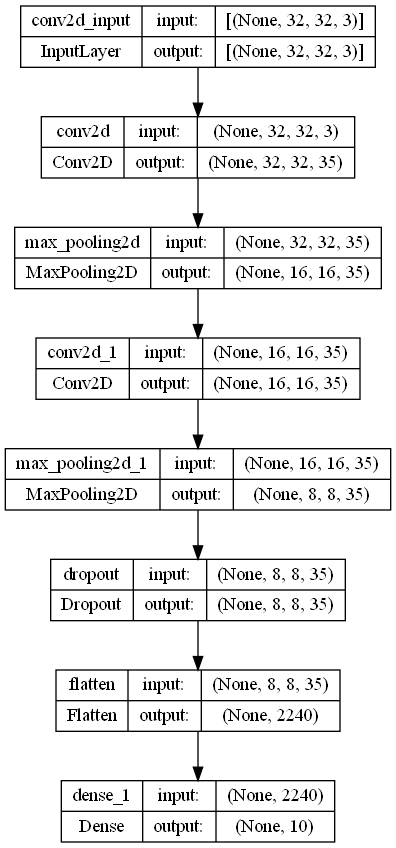

In [28]:
plot_model(model, show_shapes=True)

In [30]:
# [3-2] 모델 생성
# compile 메서드
# loss 손실 함수 => sparse_categorical_crossentropy
# optimizer 최적화 방식 => adam
# metrics 평가항목 => accuracy

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [34]:
# [3-3] 모델 학습
# fit 메서드
# 학습 데이터, 라벨
# epochs 학습횟수
# batch_size 학습분량
# validation_data (검증데이터, 검증라벨)
# validation_split 학습데이터의 일부 비율 설정 (예:0.2)
# callback
# verbose 학습 진행도 화면 출력 여부 설정

In [ ]:
his = model.fit(x_train, y_train, epochs=10,
               batch_size=10,
               validation_data=(x_val, y_val))

In [ ]:
## 시각화
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['loss'], label='Train loss')
plt.plot(his.epoch, his.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
## 시각화
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# [4] 평가
# evaluate 메서드
# 테스트 데이터, 테스트 라벨

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
# [5] 테스트
# 새로운 데이터